In [42]:
#Carga de librerías#
import pandas as pd
import numpy as np
import geopandas as gdp
from shapely.geometry import Point
%matplotlib inline
import matplotlib.pyplot as plt
import folium
from folium import plugins
import seaborn as sns
# otras librerias
from datetime import datetime
import matplotlib.pyplot as matplt
import cufflinks as cf
from IPython.display import display,HTML
cf.set_config_file(sharing='public',theme='white',offline=True)
import re
import time
import datetime 


In [43]:
#pip install seaborn

### 1. Base de dato programación intra-día COORDINADOR ELECTRICO NACIONAL (CEN)

In [44]:
#Lee el archivo:
programacion_SEN_BESS_ANDES_2B = pd.read_csv("tarea_1_csv/programacion_proyectada_almacenamiento_AES_ANDES_2B_tarea_1.csv",sep = ";")# error_bad_lines=False)
programacion_SEN_BESS_ANDES_2B = programacion_SEN_BESS_ANDES_2B[['Date','Sistema de Almacenamiento',"1","2","3","4",
                                                               "5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20",
                                                               "21","22","23","24","Total"]]
programacion_SEN_BESS_ANDES_2B.head()

#define las columnas del df:
columnas_programacion = programacion_SEN_BESS_ANDES_2B.columns
#total = index 26
#"1" = index 2.
#columnas_programacion[2]

#Ajusta los valores de las columnas para eliminar las "," y reemplazarlas por ".":
#programacion_SEN_BESS_ANDES_2B['1'] = programacion_SEN_BESS_ANDES_2B['1'].replace({',':'.'}, regex=True)
#programacion_SEN_BESS_ANDES_2B

#Lo mismo pero generalizado
for col in columnas_programacion[2:26]:
    programacion_SEN_BESS_ANDES_2B[col] = programacion_SEN_BESS_ANDES_2B[col].replace({',':'.'}, regex=True)
    #transforma los datos de la columna en datos tipo float. 
    #Transforma los datos en float
    programacion_SEN_BESS_ANDES_2B[col] = programacion_SEN_BESS_ANDES_2B[col].astype(float)

programacion_SEN_BESS_ANDES_2B

#subset de programacion_SEN_BESS_ANDES_2B
programacion_SEN_BESS_ANDES_2B_total = programacion_SEN_BESS_ANDES_2B[['Date','Total']]
#ajusta la columna date para transformarla en datetime:
#Pone la fecha correctamente de formato datetime
#programacion_SEN_BESS_ANDES_2B['Date']=programacion_SEN_BESS_ANDES_2B['Date'].astype('datetime64[ns]')

In [45]:
programacion_SEN_BESS_ANDES_2B_total

,Date,Total
0,07-07-2023,"-43,3"
1,08-07-2023,-43.6
2,09-07-2023,-43.5
3,10-07-2023,"-104,7"
4,11-07-2023,"-104,0"
...,...,...
107,22-10-2023,"-163,3"
108,23-10-2023,"-185,0"
109,24-10-2023,"-356,8"
110,25-10-2023,"-306,7"


In [46]:
programacion_SEN_BESS_ANDES_2B_total
aa = [date for date in programacion_SEN_BESS_ANDES_2B_total['Date']]
# Change index row:
programacion_SEN_BESS_ANDES_2B_total.index = aa
#del programacion_SEN_BESS_ANDES_2B_total['Date']

programacion_SEN_BESS_ANDES_2B_total['Total'] = programacion_SEN_BESS_ANDES_2B_total['Total'].replace({',':'.'}, regex=True)

programacion_SEN_BESS_ANDES_2B_total

programacion_SEN_BESS_ANDES_2B_total['Total'] =  programacion_SEN_BESS_ANDES_2B_total['Total'].astype(float)

#programacion_SEN_BESS_ANDES_2B_total['Total']

In [47]:
#pip install --upgrade nbformat
programacion_SEN_BESS_ANDES_2B_total

,Date,Total
07-07-2023,07-07-2023,-43.3
08-07-2023,08-07-2023,-43.6
09-07-2023,09-07-2023,-43.5
10-07-2023,10-07-2023,-104.7
11-07-2023,11-07-2023,-104.0
...,...,...
22-10-2023,22-10-2023,-163.3
23-10-2023,23-10-2023,-185.0
24-10-2023,24-10-2023,-356.8
25-10-2023,25-10-2023,-306.7


In [48]:
programacion_SEN_BESS_ANDES_2B_total#.transpose()
programacion_SEN_BESS_ANDES_2B_total.iplot(kind='bar',x = "Date",y = "Total", xTitle='año', yTitle="Capacity[MW]",
                    title='SAE-CRCA-PFV-ANDES2B Charge/Discharge 07/07/23-29/10/2023',
                    )#+y.columns[numero])

In [49]:
programacion_SEN_BESS_ANDES_2B_total.iloc[:,0]

07-07-2023    07-07-2023
08-07-2023    08-07-2023
09-07-2023    09-07-2023
10-07-2023    10-07-2023
11-07-2023    11-07-2023
                 ...    
22-10-2023    22-10-2023
23-10-2023    23-10-2023
24-10-2023    24-10-2023
25-10-2023    25-10-2023
26-10-2023    26-10-2023
Name: Date, Length: 112, dtype: object

#### Carga/Descarga total diaria[MW]

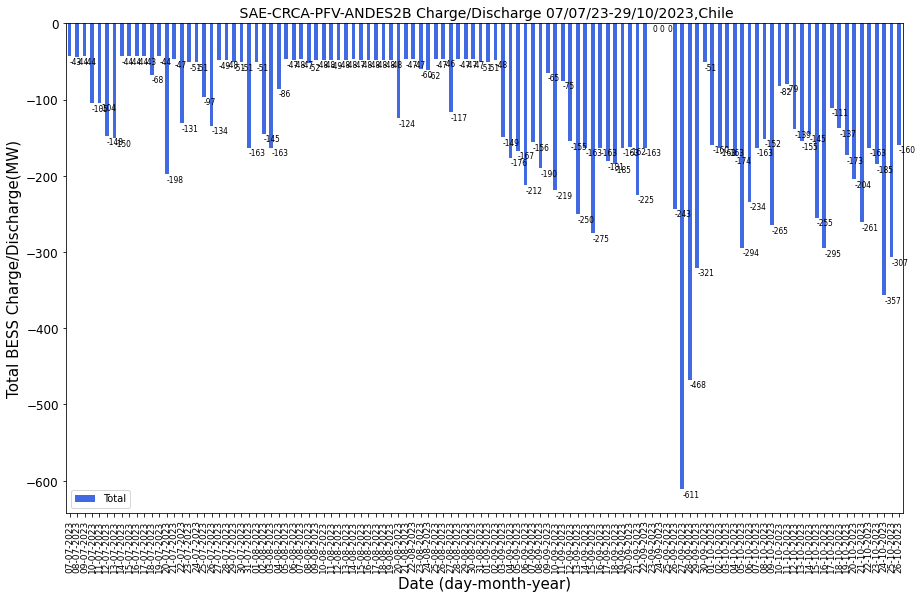

In [50]:
ax_empresa = programacion_SEN_BESS_ANDES_2B_total.plot(kind='bar',
    title = "Enterprice energy storage systems(BESS) at 10/26/2023,Chile",figsize=(15, 9),
    legend=True, fontsize=12,stacked=False,color = ['royalblue'])
#mediumturquoise
xlabels_empresa = programacion_SEN_BESS_ANDES_2B_total.iloc[:,0]
ax_empresa.set_xticklabels(xlabels_empresa,fontsize=9)
ax_empresa.set_xlabel("Date (day-month-year)", fontsize=15)
ax_empresa.set_ylabel("Total BESS Charge/Discharge(MW)", fontsize=15)
ax_empresa.set_title(" SAE-CRCA-PFV-ANDES2B Charge/Discharge 07/07/23-29/10/2023,Chile", fontsize=14)

def addtext_empresa(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]-10,str("{:.0f}".format(programacion_SEN_BESS_ANDES_2B_total['Total'][i])),color = 'black',fontsize = 7.5)

#codigo bueno:
#       plt.text(i,y[i]-1,str(programacion_SEN_BESS_ANDES_2B_total['Total'][i]),color = 'black',fontsize = 8)


#def addtext_empresa(x,y):
#    for i in range(len(x)):
#        plt.text(i,y[i]+5,str(mayor_capacidad_df_cap_empresa_final.iloc[:,7][i]),color = 'black')

#Agrega el texto en la parte superior de la barra:
#addtext_empresa(xlabels_empresa,mayor_capacidad_df_cap_empresa_final.iloc[:,8])

#Agrega el texto en la parte superior de la barra:
addtext_empresa(xlabels_empresa,programacion_SEN_BESS_ANDES_2B_total['Total'])

In [51]:

programacion_SEN_BESS_ANDES_2B_total['Total'].describe()

count    112.000000
mean    -126.500000
std       97.993271
min     -611.200000
25%     -163.300000
50%     -107.850000
75%      -47.575000
max        0.000000
Name: Total, dtype: float64

In [52]:
#Comentarios:

#mayor cantidad de descarga de la bateria que carga de la red.

#Días analizados: 77 dias (07-Julio-2023-26-Octubre-2023)
#Promedio: -140.71 MW de carga/descarga diaria.
#Min: -611.2 MW el día 27-09-2023.
#Percentiles 25%,50%,75%.
#max = 0, por lo tanto, la batería entrega más energía de que carga.

programacion_SEN_BESS_ANDES_2B_total.head()

,Date,Total
07-07-2023,07-07-2023,-43.3
08-07-2023,08-07-2023,-43.6
09-07-2023,09-07-2023,-43.5
10-07-2023,10-07-2023,-104.7
11-07-2023,11-07-2023,-104.0


In [53]:
#Veamos el comportamiento de carga/descarga por hora (24 horas) durante los distintos días de anaálisis.

### a. Comportamiento de carga/descarga por hora durante los distintos días de análisis.

In [54]:
#Data:
programacion_SEN_BESS_ANDES_2B

df_programacion_SEN_BESS_ANDES_2B = programacion_SEN_BESS_ANDES_2B.copy()
#Limpieza de la data:
del df_programacion_SEN_BESS_ANDES_2B['Sistema de Almacenamiento']
del df_programacion_SEN_BESS_ANDES_2B['Total']



In [55]:
#Df:
df_programacion_SEN_BESS_ANDES_2B

#cambia nombre columna:
df_programacion_SEN_BESS_ANDES_2B.rename(columns={"Date": "Hour"},inplace = True)
df_programacion_SEN_BESS_ANDES_2B


#Cambia el nombre de los indices:
aux_col = [hour for hour in df_programacion_SEN_BESS_ANDES_2B['Hour']]
# Change index row:
df_programacion_SEN_BESS_ANDES_2B.index = aux_col

df_programacion_SEN_BESS_ANDES_2B.head(2)
#columnas_programacion[2:26]

,Hour,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
07-07-2023,07-07-2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-103.6,-102.7,0.0,0.0,112.0,112.0,100.0,66.3,112.0,14.3
08-07-2023,08-07-2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-102.4,-101.9,0.0,0.0,112.0,112.0,112.0,112.0,68.5,0.0


In [56]:
programacion_SEN_BESS_ANDES_2B.dtypes
#programacion_SEN_BESS_ANDES_2B['Date'][0].strftime("%Y-%m-%d %H:%M:%S")
programacion_SEN_BESS_ANDES_2B

df_grafico = programacion_SEN_BESS_ANDES_2B[[col for col in columnas_programacion[2:26]]]
lista_columnas_df_grafico = df_grafico.columns
lista_columnas_df_grafico = lista_columnas_df_grafico.tolist()
programacion_SEN_BESS_ANDES_2B

#Transpone el df para graficar.
dataframe1 = programacion_SEN_BESS_ANDES_2B.transpose()
dataframe1.columns

dataframe1#.iloc[0]
dataframe1.drop(["Sistema de Almacenamiento"], axis=0, inplace=True)
dataframe1.drop(["Total"], axis=0, inplace=True)

dataframe1['Hour'] = [x for x in range(25)]

dataframe1.drop(["Date"], axis=0, inplace=True)
dataframe1

,0,1,2,3,4,5,6,7,8,9,...,103,104,105,106,107,108,109,110,111,Hour
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.1,-0.1,-0.2,-0.3,-0.4,0.0,7
8,0.0,0.0,0.0,0.0,0.0,-6.0,0.0,0.0,0.0,0.0,...,0.0,-8.5,0.0,0.1,0.1,0.2,0.3,0.4,0.0,8
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-29.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
10,0.0,0.0,-98.8,-98.3,0.0,0.0,0.0,-89.5,-52.9,-93.6,...,0.0,-43.6,0.0,-36.1,-112.0,-33.0,-38.4,-39.4,-41.1,10


In [57]:

#Plot de los datos:
dataframe1.iplot(kind='bar',x = "Hour", xTitle='Hour', yTitle="Capacity[MWh]",
                    title='OPERACION PROGRAMADA CEN ANDES-2B 07/07/23-29/10/2023')

In [58]:
del df_programacion_SEN_BESS_ANDES_2B['Hour']


#Transpone el df para graficar.
dataframe1 = df_programacion_SEN_BESS_ANDES_2B.transpose()
dataframe1

,07-07-2023,08-07-2023,09-07-2023,10-07-2023,11-07-2023,12-07-2023,13-07-2023,14-07-2023,15-07-2023,16-07-2023,...,17-10-2023,18-10-2023,19-10-2023,20-10-2023,21-10-2023,22-10-2023,23-10-2023,24-10-2023,25-10-2023,26-10-2023
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.1,-0.1,-0.2,-0.3,-0.4,0.0
8,0.0,0.0,0.0,0.0,0.0,-6.0,0.0,0.0,0.0,0.0,...,-8.1,0.0,-8.5,0.0,0.1,0.1,0.2,0.3,0.4,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-28.0,0.0,-29.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,-98.8,-98.3,0.0,0.0,0.0,-89.5,-52.9,-93.6,...,-42.9,0.0,-43.6,0.0,-36.1,-112.0,-33.0,-38.4,-39.4,-41.1


In [59]:
# ax_empresa_2 = dataframe1.plot(kind='bar',
#     title = "Enterprice energy storage systems(BESS) at 10/26/2023,Chile",figsize=(15, 9),
#     legend=False, fontsize=12,stacked=False,color = ['royalblue'])
# #mediumturquoise
# xlabels_empresa_2 = dataframe1.index
# ax_empresa_2.set_xticklabels(xlabels_empresa_2,fontsize=9)
# ax_empresa_2.set_xlabel("Hour", fontsize=15)
# ax_empresa_2.set_ylabel("Charge/Discharge(MW)", fontsize=15)
# ax_empresa_2.set_title("Programming PFV ANDES SOLAR II-B charging/discharging by CEN 07/07/23-29/10/2023,Chile", fontsize=14)

In [60]:
programacion_SEN_BESS_ANDES_2B['mes'] = str()

programacion_SEN_BESS_ANDES_2B 


#programacion_SEN_BESS_ANDES_2B['Date']=pd.to_datetime(programacion_SEN_BESS_ANDES_2B['Date'],format='%d%m%y')
#programacion_SEN_BESS_ANDES_2B
aux_mes = []
for i in range(len(programacion_SEN_BESS_ANDES_2B['Date'])):
    #print("Date",programacion_SEN_BESS_ANDES_2B['Date'][i])
    fecha_string = programacion_SEN_BESS_ANDES_2B['Date'][i]
    fecha = datetime.datetime.strptime(fecha_string, "%d-%m-%Y")
    dia = fecha.day
    mes = fecha.month
    anio = fecha.year
    #print("mes",mes)
    if mes == 7:
        aux_mes.append("JULIO")
    if mes == 8:
        aux_mes.append("AGOSTO")
        
    if mes == 9:
        aux_mes.append("SEPTIEMBRE")
    if mes == 10:
        aux_mes.append("OCTUBRE")
programacion_SEN_BESS_ANDES_2B['mes'] = aux_mes 

#### Ahora separaremos el dataframe con todos los meses (Julio/agosto/septiembre/octubre) en subset con sólo 1 mes.

In [61]:

#Dataframe con todos los meses(Julio/agosto/septiembre/octubre)
programacion_SEN_BESS_ANDES_2B

#Julio:
programacion_SEN_BESS_ANDES_2B_JULIO = programacion_SEN_BESS_ANDES_2B.loc[programacion_SEN_BESS_ANDES_2B['mes'] == "JULIO"]
#Reset index:
programacion_SEN_BESS_ANDES_2B_JULIO = programacion_SEN_BESS_ANDES_2B_JULIO.reset_index(drop=True)

#Agosto:
programacion_SEN_BESS_ANDES_2B_AGOSTO = programacion_SEN_BESS_ANDES_2B.loc[programacion_SEN_BESS_ANDES_2B['mes'] == "AGOSTO"]
#Reset index:
programacion_SEN_BESS_ANDES_2B_AGOSTO = programacion_SEN_BESS_ANDES_2B_AGOSTO.reset_index(drop=True)

#Septiembre:
programacion_SEN_BESS_ANDES_2B_SEPTIEMBRE = programacion_SEN_BESS_ANDES_2B.loc[programacion_SEN_BESS_ANDES_2B['mes'] == "SEPTIEMBRE"]
#Reset index:
programacion_SEN_BESS_ANDES_2B_SEPTIEMBRE = programacion_SEN_BESS_ANDES_2B_SEPTIEMBRE.reset_index(drop=True)

#Octubre:
programacion_SEN_BESS_ANDES_2B_OCTUBRE = programacion_SEN_BESS_ANDES_2B.loc[programacion_SEN_BESS_ANDES_2B['mes'] == "OCTUBRE"]
#Reset index:
programacion_SEN_BESS_ANDES_2B_OCTUBRE = programacion_SEN_BESS_ANDES_2B_OCTUBRE.reset_index(drop=True)


#####  Base de datos con toda la info de la programación del CEN

In [62]:
#Base de datos con toda la info de la programación del CEN
programacion_SEN_BESS_ANDES_2B

,Date,Sistema de Almacenamiento,1,2,3,4,5,6,7,8,...,17,18,19,20,21,22,23,24,Total,mes
0,07-07-2023,SAE-CRCA-PFV-ANDES2B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,112.0,112.0,100.0,66.3,112.0,14.3,"-43,3",JULIO
1,08-07-2023,SAE-CRCA-PFV-ANDES2B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,112.0,112.0,112.0,112.0,68.5,0.0,-43.6,JULIO
2,09-07-2023,SAE-CRCA-PFV-ANDES2B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,68.5,112.0,112.0,112.0,112.0,0.0,0.0,-43.5,JULIO
3,10-07-2023,SAE-CRCA-PFV-ANDES2B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,28.6,112.0,90.8,112.0,112.0,0.0,0.0,"-104,7",JULIO
4,11-07-2023,SAE-CRCA-PFV-ANDES2B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,96.8,112.0,0.0,0.0,0.0,0.0,0.0,"-104,0",JULIO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,22-10-2023,SAE-CRCA-PFV-ANDES2B,0.0,0.0,0.0,0.0,0.0,0.0,-0.1,0.1,...,-112.0,-6.8,0.0,0.0,112.0,112.0,112.0,112.0,"-163,3",OCTUBRE
108,23-10-2023,SAE-CRCA-PFV-ANDES2B,0.0,0.0,0.0,0.0,0.0,0.0,-0.2,0.2,...,-112.0,-65.0,0.0,0.0,112.0,112.0,112.0,90.1,"-185,0",OCTUBRE
109,24-10-2023,SAE-CRCA-PFV-ANDES2B,0.0,0.0,0.0,0.0,0.0,0.0,-0.3,0.3,...,-43.6,-60.1,0.0,0.0,0.0,112.0,50.3,92.1,"-356,8",OCTUBRE
110,25-10-2023,SAE-CRCA-PFV-ANDES2B,0.0,0.0,0.0,0.0,0.0,0.0,-0.4,0.4,...,-112.0,-112.0,0.0,0.0,55.6,112.0,72.5,64.4,"-306,7",OCTUBRE


#### lectura de data real (OPERACIÓN REAL DEL CEN)

In [63]:
#lectura de data real

#data_generacion_real_horaria_por_central_SEN_tarea_1

#Lee el archivo:
operacion_REAL_BESS_ANDES_2B = pd.read_csv("tarea_1_csv/data_generacion_real_horaria_por_central_SEN_tarea_1.csv",sep = ";")
operacion_REAL_BESS_ANDES_2B
operacion_REAL_BESS_ANDES_2B['Date'] = str()

operacion_REAL_BESS_ANDES_2B



,Fecha y Hora,Nombre Central,Generación Real (MWh),Date
0,07-07-2023 1:00,PFV ANDES SOLAR II-B,0,
1,07-07-2023 2:00,PFV ANDES SOLAR II-B,0,
2,07-07-2023 3:00,PFV ANDES SOLAR II-B,0,
3,07-07-2023 4:00,PFV ANDES SOLAR II-B,0,
4,07-07-2023 5:00,PFV ANDES SOLAR II-B,0,
...,...,...,...,...
2731,29-10-2023 20:00,PFV ANDES SOLAR II-B,2,
2732,29-10-2023 21:00,PFV ANDES SOLAR II-B,110,
2733,29-10-2023 22:00,PFV ANDES SOLAR II-B,112,
2734,29-10-2023 23:00,PFV ANDES SOLAR II-B,112,


In [64]:

fechas_disponibles_teorico = programacion_SEN_BESS_ANDES_2B['Date']

fechas_disponibles_teorico = fechas_disponibles_teorico.tolist()


#OPERACION REAL:
operacion_REAL_BESS_ANDES_2B
#OPERACION TEORICA:
programacion_SEN_BESS_ANDES_2B

,Date,Sistema de Almacenamiento,1,2,3,4,5,6,7,8,...,17,18,19,20,21,22,23,24,Total,mes
0,07-07-2023,SAE-CRCA-PFV-ANDES2B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,112.0,112.0,100.0,66.3,112.0,14.3,"-43,3",JULIO
1,08-07-2023,SAE-CRCA-PFV-ANDES2B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,112.0,112.0,112.0,112.0,68.5,0.0,-43.6,JULIO
2,09-07-2023,SAE-CRCA-PFV-ANDES2B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,68.5,112.0,112.0,112.0,112.0,0.0,0.0,-43.5,JULIO
3,10-07-2023,SAE-CRCA-PFV-ANDES2B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,28.6,112.0,90.8,112.0,112.0,0.0,0.0,"-104,7",JULIO
4,11-07-2023,SAE-CRCA-PFV-ANDES2B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,96.8,112.0,0.0,0.0,0.0,0.0,0.0,"-104,0",JULIO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,22-10-2023,SAE-CRCA-PFV-ANDES2B,0.0,0.0,0.0,0.0,0.0,0.0,-0.1,0.1,...,-112.0,-6.8,0.0,0.0,112.0,112.0,112.0,112.0,"-163,3",OCTUBRE
108,23-10-2023,SAE-CRCA-PFV-ANDES2B,0.0,0.0,0.0,0.0,0.0,0.0,-0.2,0.2,...,-112.0,-65.0,0.0,0.0,112.0,112.0,112.0,90.1,"-185,0",OCTUBRE
109,24-10-2023,SAE-CRCA-PFV-ANDES2B,0.0,0.0,0.0,0.0,0.0,0.0,-0.3,0.3,...,-43.6,-60.1,0.0,0.0,0.0,112.0,50.3,92.1,"-356,8",OCTUBRE
110,25-10-2023,SAE-CRCA-PFV-ANDES2B,0.0,0.0,0.0,0.0,0.0,0.0,-0.4,0.4,...,-112.0,-112.0,0.0,0.0,55.6,112.0,72.5,64.4,"-306,7",OCTUBRE


In [65]:
aux_fecha = []
aux_capacidad = []
for i in range(len(operacion_REAL_BESS_ANDES_2B['Fecha y Hora'])):
    #print(operacion_REAL_BESS_ANDES_2B['Fecha y Hora'][i])
    fecha_string_data_real = operacion_REAL_BESS_ANDES_2B['Fecha y Hora'][i]
    fecha_1 = datetime.datetime.strptime(fecha_string_data_real, "%d-%m-%Y %H:%M")
    dia = fecha_1.day
    mes = fecha_1.month
    anio = fecha_1.year
    if dia <=9:
        dia = "0"+str(dia)
    if mes <= 9:
        mes = "0"+str(mes)


    #print(str(dia)+"-"+str(mes)+"-"+str(anio))#,mes,str(-),anio)
    evaluacion_fecha = str(dia)+"-"+str(mes)+"-"+str(anio)#,mes,str(-),anio

    if evaluacion_fecha in fechas_disponibles_teorico:
        aux_fecha.append(evaluacion_fecha)

        #print("indice",i)

        #print("fecha final",evaluacion_fecha)
        #print("capacidad:",operacion_REAL_BESS_ANDES_2B['Generación Real (MWh)'][i])
        aux_capacidad.append(operacion_REAL_BESS_ANDES_2B['Generación Real (MWh)'][i])



In [66]:
aux_fecha
#Transforma el array en dataframes:
#DF número de proyectos por empresa:
df_aux_fecha = pd.DataFrame(aux_fecha)
len(df_aux_fecha[0].unique())

df_aux_fecha
df_aux_fecha['Generación Real (MWh)'] = int()

df_aux_fecha['Generación Real (MWh)'] = aux_capacidad

df_aux_fecha.head()#[0]

,0,Generación Real (MWh)
0,07-07-2023,0
1,07-07-2023,0
2,07-07-2023,0
3,07-07-2023,0
4,07-07-2023,0


In [67]:
df_aux_fecha

for i in range(len(fechas_disponibles_teorico)):

    if i == 0:
        #caso i = 0
         #separa las fechas:
        separacion_por_fecha = df_aux_fecha.loc[df_aux_fecha[0] == fechas_disponibles_teorico[0]]
        #Reset index:
        separacion_por_fecha = separacion_por_fecha.reset_index(drop=True)
        #Cambia el nombre de la columna:
        separacion_por_fecha.rename(columns={"Generación Real (MWh)": "Date"},inplace = True)
        #Elimina la fila 0:(fecha)
        del separacion_por_fecha[0]
        #traspose:
        separacion_por_fecha = separacion_por_fecha.transpose()

        # Change index name:
        separacion_por_fecha.rename(index={'Date':fechas_disponibles_teorico[0]},inplace=True)

        #caso i =1:
        #separa las fechas:
        separacion_por_fecha_c1 = df_aux_fecha.loc[df_aux_fecha[0] == fechas_disponibles_teorico[1]]
        #Reset index:
        separacion_por_fecha_c1 = separacion_por_fecha_c1.reset_index(drop=True)
        #Cambia el nombre de la columna:
        separacion_por_fecha_c1.rename(columns={"Generación Real (MWh)": "Date"},inplace = True)
        #Elimina la fila 0:(fecha)
        del separacion_por_fecha_c1[0]
        #traspose:
        separacion_por_fecha_c1 = separacion_por_fecha_c1.transpose()

        # Change index name:
        separacion_por_fecha_c1.rename(index={'Date':fechas_disponibles_teorico[1]},inplace=True)

        #une los dfs:
        frames = [separacion_por_fecha,separacion_por_fecha_c1]
        all_csv_unidos = pd.concat(frames)

    if i >=2:
        #separa las fechas:
        separacion_por_fecha = df_aux_fecha.loc[df_aux_fecha[0] == fechas_disponibles_teorico[i]]
        #Reset index:
        separacion_por_fecha = separacion_por_fecha.reset_index(drop=True)
        #Cambia el nombre de la columna:
        separacion_por_fecha.rename(columns={"Generación Real (MWh)": "Date"},inplace = True)
        #Elimina la fila 0:(fecha)
        del separacion_por_fecha[0]
        #traspose:
        separacion_por_fecha = separacion_por_fecha.transpose()

        # Change index name:
        separacion_por_fecha.rename(index={'Date':fechas_disponibles_teorico[i]},inplace=True)
        
        frames = [all_csv_unidos,separacion_por_fecha]
        all_csv_unidos_2 = pd.concat(frames)
        all_csv_unidos = all_csv_unidos_2


all_csv_unidos
df_operacion_REAL_BESS_ANDES_2B = all_csv_unidos.copy()

#separacion_por_fecha.transpose()

In [68]:
df_operacion_REAL_BESS_ANDES_2B
#Cambia el nombre de la columnas:
df_operacion_REAL_BESS_ANDES_2B = df_operacion_REAL_BESS_ANDES_2B.rename(columns=lambda x: x+1)

In [69]:
df_operacion_REAL_BESS_ANDES_2B


,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
07-07-2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,10.0,13.0,...,32.0,25.0,25.0,15.0,40.0,105.0,105.0,105.0,105.0,6.0
08-07-2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,8.0,...,10.0,10.0,10.0,10.0,10.0,56.0,105.0,105.0,105.0,60.0
09-07-2023,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,10.0,10.0,...,10.0,10.0,10.0,10.0,27.0,100.0,100.0,100.0,100.0,5.0
10-07-2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,5.0,...,5.0,9.0,10.0,7.0,66.0,105.0,105.0,105.0,68.0,0.0
11-07-2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,10.0,10.0,...,0.0,0.0,0.0,0.0,94.0,100.0,100.0,100.0,24.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22-10-2023,34.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,...,3.0,3.0,39.0,27.0,3.0,106.0,112.0,112.0,112.0,85.0
23-10-2023,8.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,3.0,...,60.0,86.0,75.0,69.0,27.0,3.0,107.0,112.0,112.0,112.0
24-10-2023,76.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,16.0,3.0,...,54.0,53.0,52.0,51.0,31.0,41.0,112.0,112.0,112.0,112.0
25-10-2023,52.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,...,48.0,70.0,66.0,58.0,17.0,1.0,40.0,108.0,108.0,108.0


In [70]:
df_operacion_REAL_BESS_ANDES_2B
df_operacion_REAL_BESS_ANDES_2B['Date'] = str()
df_operacion_REAL_BESS_ANDES_2B['Date'] = fechas_disponibles_teorico

df_operacion_REAL_BESS_ANDES_2B['mes'] = str()

df_operacion_REAL_BESS_ANDES_2B['mes'] =aux_mes

In [71]:
programacion_SEN_BESS_ANDES_2B

,Date,Sistema de Almacenamiento,1,2,3,4,5,6,7,8,...,17,18,19,20,21,22,23,24,Total,mes
0,07-07-2023,SAE-CRCA-PFV-ANDES2B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,112.0,112.0,100.0,66.3,112.0,14.3,"-43,3",JULIO
1,08-07-2023,SAE-CRCA-PFV-ANDES2B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,112.0,112.0,112.0,112.0,68.5,0.0,-43.6,JULIO
2,09-07-2023,SAE-CRCA-PFV-ANDES2B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,68.5,112.0,112.0,112.0,112.0,0.0,0.0,-43.5,JULIO
3,10-07-2023,SAE-CRCA-PFV-ANDES2B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,28.6,112.0,90.8,112.0,112.0,0.0,0.0,"-104,7",JULIO
4,11-07-2023,SAE-CRCA-PFV-ANDES2B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,96.8,112.0,0.0,0.0,0.0,0.0,0.0,"-104,0",JULIO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,22-10-2023,SAE-CRCA-PFV-ANDES2B,0.0,0.0,0.0,0.0,0.0,0.0,-0.1,0.1,...,-112.0,-6.8,0.0,0.0,112.0,112.0,112.0,112.0,"-163,3",OCTUBRE
108,23-10-2023,SAE-CRCA-PFV-ANDES2B,0.0,0.0,0.0,0.0,0.0,0.0,-0.2,0.2,...,-112.0,-65.0,0.0,0.0,112.0,112.0,112.0,90.1,"-185,0",OCTUBRE
109,24-10-2023,SAE-CRCA-PFV-ANDES2B,0.0,0.0,0.0,0.0,0.0,0.0,-0.3,0.3,...,-43.6,-60.1,0.0,0.0,0.0,112.0,50.3,92.1,"-356,8",OCTUBRE
110,25-10-2023,SAE-CRCA-PFV-ANDES2B,0.0,0.0,0.0,0.0,0.0,0.0,-0.4,0.4,...,-112.0,-112.0,0.0,0.0,55.6,112.0,72.5,64.4,"-306,7",OCTUBRE


In [72]:
df_operacion_REAL_BESS_ANDES_2B = df_operacion_REAL_BESS_ANDES_2B[['Date',1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,
                                                                   23,24,"mes"]]
df_operacion_REAL_BESS_ANDES_2B

,Date,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,mes
07-07-2023,07-07-2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,10.0,...,25.0,25.0,15.0,40.0,105.0,105.0,105.0,105.0,6.0,JULIO
08-07-2023,08-07-2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,...,10.0,10.0,10.0,10.0,56.0,105.0,105.0,105.0,60.0,JULIO
09-07-2023,09-07-2023,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,10.0,...,10.0,10.0,10.0,27.0,100.0,100.0,100.0,100.0,5.0,JULIO
10-07-2023,10-07-2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,...,9.0,10.0,7.0,66.0,105.0,105.0,105.0,68.0,0.0,JULIO
11-07-2023,11-07-2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,10.0,...,0.0,0.0,0.0,94.0,100.0,100.0,100.0,24.0,0.0,JULIO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22-10-2023,22-10-2023,34.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,3.0,39.0,27.0,3.0,106.0,112.0,112.0,112.0,85.0,OCTUBRE
23-10-2023,23-10-2023,8.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,...,86.0,75.0,69.0,27.0,3.0,107.0,112.0,112.0,112.0,OCTUBRE
24-10-2023,24-10-2023,76.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,16.0,...,53.0,52.0,51.0,31.0,41.0,112.0,112.0,112.0,112.0,OCTUBRE
25-10-2023,25-10-2023,52.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,70.0,66.0,58.0,17.0,1.0,40.0,108.0,108.0,108.0,OCTUBRE


In [73]:
#Por lo tanto, ya tenemos las 2 bases de datos:

#OPERACION REAL:
df_operacion_REAL_BESS_ANDES_2B
#PROGRAMACION CEN:
programacion_SEN_BESS_ANDES_2B

,Date,Sistema de Almacenamiento,1,2,3,4,5,6,7,8,...,17,18,19,20,21,22,23,24,Total,mes
0,07-07-2023,SAE-CRCA-PFV-ANDES2B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,112.0,112.0,100.0,66.3,112.0,14.3,"-43,3",JULIO
1,08-07-2023,SAE-CRCA-PFV-ANDES2B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,112.0,112.0,112.0,112.0,68.5,0.0,-43.6,JULIO
2,09-07-2023,SAE-CRCA-PFV-ANDES2B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,68.5,112.0,112.0,112.0,112.0,0.0,0.0,-43.5,JULIO
3,10-07-2023,SAE-CRCA-PFV-ANDES2B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,28.6,112.0,90.8,112.0,112.0,0.0,0.0,"-104,7",JULIO
4,11-07-2023,SAE-CRCA-PFV-ANDES2B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,96.8,112.0,0.0,0.0,0.0,0.0,0.0,"-104,0",JULIO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,22-10-2023,SAE-CRCA-PFV-ANDES2B,0.0,0.0,0.0,0.0,0.0,0.0,-0.1,0.1,...,-112.0,-6.8,0.0,0.0,112.0,112.0,112.0,112.0,"-163,3",OCTUBRE
108,23-10-2023,SAE-CRCA-PFV-ANDES2B,0.0,0.0,0.0,0.0,0.0,0.0,-0.2,0.2,...,-112.0,-65.0,0.0,0.0,112.0,112.0,112.0,90.1,"-185,0",OCTUBRE
109,24-10-2023,SAE-CRCA-PFV-ANDES2B,0.0,0.0,0.0,0.0,0.0,0.0,-0.3,0.3,...,-43.6,-60.1,0.0,0.0,0.0,112.0,50.3,92.1,"-356,8",OCTUBRE
110,25-10-2023,SAE-CRCA-PFV-ANDES2B,0.0,0.0,0.0,0.0,0.0,0.0,-0.4,0.4,...,-112.0,-112.0,0.0,0.0,55.6,112.0,72.5,64.4,"-306,7",OCTUBRE


In [74]:
df_programacion_SEN_BESS_ANDES_2B = programacion_SEN_BESS_ANDES_2B[['Date',"1","2","3","4","5","6","7","8","9","10","11","12",
                                                                    "13","14","15","16","17","18","19","20","21","22",
                                                                   "23","24","mes"]]


In [75]:
df_programacion_SEN_BESS_ANDES_2B.head(1)

,Date,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,mes
0,07-07-2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-102.7,0.0,0.0,112.0,112.0,100.0,66.3,112.0,14.3,JULIO


In [76]:
df_operacion_REAL_BESS_ANDES_2B.head(1)

,Date,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,mes
07-07-2023,07-07-2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,10.0,...,25.0,25.0,15.0,40.0,105.0,105.0,105.0,105.0,6.0,JULIO


### 3. ANALISIS ESTADÍSTICO DE LOS DATOS:

##### BASES DE DATOS FINALES PFV ANDES SOLAR II-B:
* DATA PROGRAMACION coordinador electrico nacional (CEN): 

1.      df_programacion_SEN_BESS_ANDES_2B

* DATA operación REAL observada en el sistema electrico nacional (SEN): 

2.      df_operacion_REAL_BESS_ANDES_2B

NÚMERO DE DÍAS DE ANALISIS POR MES/TOTAL:

In [77]:
df_programacion_SEN_BESS_ANDES_2B

#Dataframe con todos los meses(Julio/agosto/septiembre/octubre)
df_programacion_SEN_BESS_ANDES_2B

#Julio:
df_programacion_SEN_BESS_ANDES_2B_JULIO = df_programacion_SEN_BESS_ANDES_2B.loc[df_programacion_SEN_BESS_ANDES_2B['mes'] == "JULIO"]
#Reset index:
df_programacion_SEN_BESS_ANDES_2B_JULIO = df_programacion_SEN_BESS_ANDES_2B_JULIO.reset_index(drop=True)

#Agosto:
df_programacion_SEN_BESS_ANDES_2B_AGOSTO = df_programacion_SEN_BESS_ANDES_2B.loc[df_programacion_SEN_BESS_ANDES_2B['mes'] == "AGOSTO"]
#Reset index:
df_programacion_SEN_BESS_ANDES_2B_AGOSTO = df_programacion_SEN_BESS_ANDES_2B_AGOSTO.reset_index(drop=True)

#Septiembre:
df_programacion_SEN_BESS_ANDES_2B_SEPTIEMBRE = df_programacion_SEN_BESS_ANDES_2B.loc[df_programacion_SEN_BESS_ANDES_2B['mes'] == "SEPTIEMBRE"]
#Reset index:
df_programacion_SEN_BESS_ANDES_2B_SEPTIEMBRE = df_programacion_SEN_BESS_ANDES_2B_SEPTIEMBRE.reset_index(drop=True)

#Octubre:
df_programacion_SEN_BESS_ANDES_2B_OCTUBRE = df_programacion_SEN_BESS_ANDES_2B.loc[df_programacion_SEN_BESS_ANDES_2B['mes'] == "OCTUBRE"]
#Reset index:
df_programacion_SEN_BESS_ANDES_2B_OCTUBRE = df_programacion_SEN_BESS_ANDES_2B_OCTUBRE.reset_index(drop=True)

print("\n Fecha comienzo de análisis:",df_programacion_SEN_BESS_ANDES_2B['Date'][0],
      "\n Fecha final de análisis:",df_programacion_SEN_BESS_ANDES_2B['Date'][len(df_programacion_SEN_BESS_ANDES_2B)-1],
      "\n Total de días analizados:",len(df_programacion_SEN_BESS_ANDES_2B),
      "\n Total de días Julio:",len(df_programacion_SEN_BESS_ANDES_2B_JULIO),
      "\n Total de días Agosto:",len(df_programacion_SEN_BESS_ANDES_2B_AGOSTO),
      "\n Total de días Septiembre:",len(df_programacion_SEN_BESS_ANDES_2B_SEPTIEMBRE),
      "\n Total de días Octubre:",len(df_programacion_SEN_BESS_ANDES_2B_OCTUBRE))



 Fecha comienzo de análisis: 07-07-2023 
 Fecha final de análisis: 26-10-2023 
 Total de días analizados: 112 
 Total de días Julio: 25 
 Total de días Agosto: 31 
 Total de días Septiembre: 30 
 Total de días Octubre: 26


In [137]:
len(df_programacion_SEN_BESS_ANDES_2B_OCTUBRE)
# Make the plot
meses = ['July','August','September','October']
meses
array_programacion = [
df_programacion_SEN_BESS_ANDES_2B_JULIO,df_programacion_SEN_BESS_ANDES_2B_AGOSTO,
df_programacion_SEN_BESS_ANDES_2B_SEPTIEMBRE,df_programacion_SEN_BESS_ANDES_2B_OCTUBRE]
colors = ['cadetblue','midnightblue','gold','darkgray']

#royalblue

len(array_programacion[0])

x = np.arange(32)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

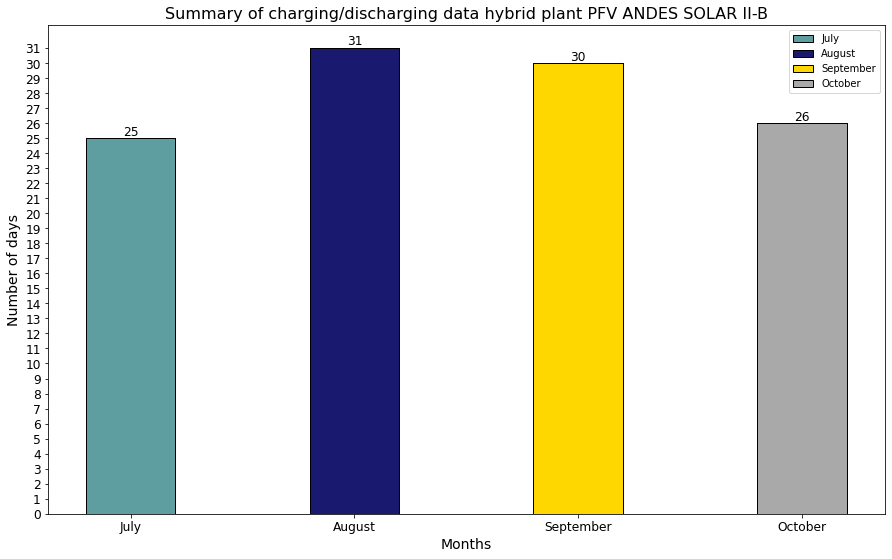

In [138]:
#Plot datos por mes:
fig_datos_mes = plt.subplots(figsize =(15, 9)) 
#Recorre los meses:
for i in range(len(meses)):
    #print(i)
    #plot data programación CEN.
    plt.bar(meses[i], height= len(array_programacion[i]), color =colors[i], width = 0.4, 
        edgecolor ='black', label =meses[i])
    #plt.bar_label(container= plt.bar(meses[i], height= len(array_programacion[i]), color =colors[i], width = 0.4, 
    #    edgecolor ='black', label =meses[i]),fmt = lambda x: f'{x :.0f}' )
    #plt.legend()
    

plt.xlabel("Months",fontsize=14) 
plt.ylabel("Number of days",fontsize=14) 
plt.title("Summary of charging/discharging data hybrid plant PFV ANDES SOLAR II-B",fontsize=16)
plt.legend()#['Programming of the national electric coordinator (CEN) for charging/discharging BESS ANDES2B',
#             'Actual discharge of BESS ANDES-2B'], loc='upper left')
plt.xticks(fontsize=12.3)
plt.yticks(x,fontsize=12.3)
plt.bar_label(container= plt.bar(meses[0], height= len(array_programacion[0]), color =colors[0], width = 0.4, 
        edgecolor ='black', label =meses[0]),fmt = lambda x: f'{x :.0f}',fontsize=12.3 )
plt.bar_label(container= plt.bar(meses[1], height= len(array_programacion[1]), color =colors[1], width = 0.4, 
        edgecolor ='black', label =meses[1]),fmt = lambda x: f'{x :.0f}',fontsize=12.3 )
plt.bar_label(container= plt.bar(meses[2], height= len(array_programacion[2]), color =colors[2], width = 0.4, 
        edgecolor ='black', label =meses[2]),fmt = lambda x: f'{x :.0f}',fontsize=12.3 )
plt.bar_label(container= plt.bar(meses[3], height= len(array_programacion[3]), color =colors[3], width = 0.4, 
        edgecolor ='black', label =meses[3]),fmt = lambda x: f'{x :.0f}',fontsize=12.3 )

plt.show()


In [80]:
# #Plot datos por mes:
# fig_datos_mes = plt.subplots(figsize =(15, 9)) 


# # Make the plot
# x = np.arange(24)
# x = x+1
# valor_suma = 0
# #Recorre las 77 columnas:
# for i in range(len(df_plot_operacion_REAL_BESS_ANDES2B.columns)):

#         #Plot de los dif. valores de las horas para c/columna.

#         #plot data programación CEN.
#         plt.bar(x+valor_suma, height= df_plot_programacion_CEN_BESS_ANDES2B[i], color ='b', width = 0.004, 
#                 edgecolor ='blue', label ='Programming of the national electric coordinator (CEN) for charging/discharging BESS ANDES2B')

        
#         #Plot data operación REAL:
#         plt.bar(x+valor_suma, height= df_plot_operacion_REAL_BESS_ANDES2B[i], color ='r', width = 0.004, 
#                 edgecolor ='red', label ='Actual discharge of BESS ANDES-2B',alpha=0.4)
#         valor_suma = valor_suma+0.004

        
# plt.xlabel("Hours",fontsize=14) 
# plt.ylabel("Capacity[MWh]",fontsize=14) 
# plt.title("Programming charging/discharging vs. actual discharge BESS ANDES2B",fontsize=16)
# plt.legend(['Programming of the national electric coordinator (CEN) for charging/discharging BESS ANDES2B',
#              'Actual discharge of BESS ANDES-2B'], loc='upper left')
# plt.xticks(x,fontsize=12.3)
# plt.yticks(fontsize=12.3)
# plt.show()

### Distribución de carga/descarga según programación CEN:
###### DATAFRAME: df_programacion_SEN_BESS_ANDES_2B_final

In [81]:
#Crea una copia del DF asociado a la base de datos que contiene la programación del CEN.
df_programacion_SEN_BESS_ANDES_2B_final = df_programacion_SEN_BESS_ANDES_2B.copy()


#Elimina las columnas que no sirven:
del df_programacion_SEN_BESS_ANDES_2B_final['mes']

#Transpone el df para graficar.
df_programacion_SEN_BESS_ANDES_2B_final_traspose = df_programacion_SEN_BESS_ANDES_2B_final.transpose()

#df_programacion_SEN_BESS_ANDES_2B_traspose.iloc[0,:]
df_programacion_SEN_BESS_ANDES_2B_final_traspose.drop(['Date'], axis=0, inplace=True)


Text(0.5, 1.0, ' PFV ANDES SOLAR II-B intraday scheduling by CEN (07/07/23-29/10/2023),Chile')

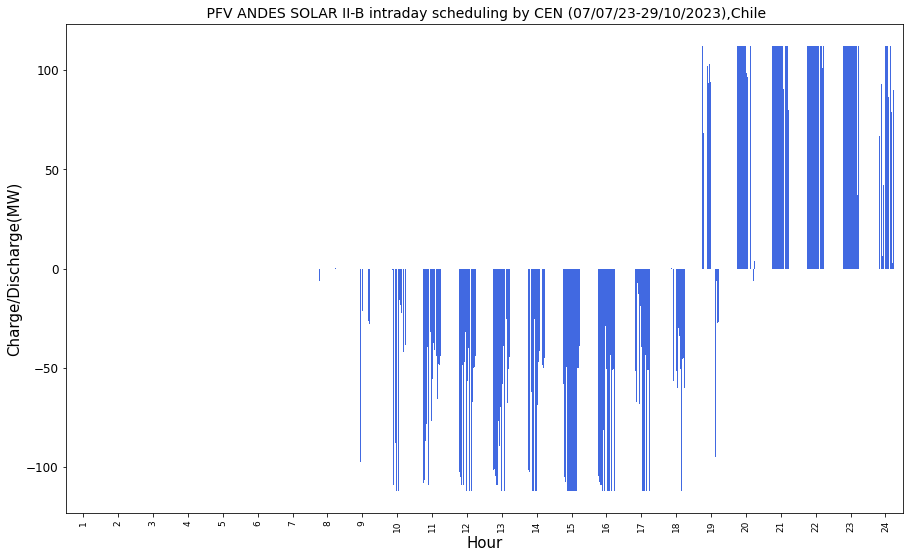

In [82]:
ax_programado_CEN = df_programacion_SEN_BESS_ANDES_2B_final_traspose.plot(kind='bar',
    title = "Enterprice energy storage systems(BESS) at 10/26/2023,Chile",figsize=(15, 9),
    legend=False, fontsize=12,stacked=False,color = ['royalblue'])
#mediumturquoise
xlabels_programado_CEN = df_programacion_SEN_BESS_ANDES_2B_final_traspose.index
ax_programado_CEN.set_xticklabels(xlabels_programado_CEN,fontsize=9)
ax_programado_CEN.set_xlabel("Hour", fontsize=15)
ax_programado_CEN.set_ylabel("Charge/Discharge(MW)", fontsize=15)
ax_programado_CEN.set_title(" PFV ANDES SOLAR II-B intraday scheduling by CEN (07/07/23-29/10/2023),Chile", fontsize=14)
                            
                            #PFV ANDES SOLAR II-B Charge/Discharge 07/07/23-29/10/2023,Chile"


#Programación del CEN para la carga/descarga de la planta BESS ANDES-2B

##### Observaciones data programacion CEN:

max cantidad de carga: -112 MWh 

max cantidad de descarga: 112 MWh

tiempo de carga: entre 10:00 y 18:00 hrs la batería se carga, mientras que entrega energía al sistema entre 20:00-24:00 hrs

In [83]:
#Queda pendiente:
#analizar histograma de los datos en las horas de descarga(19-24 hrs)
#promedio de descarga por hora (19:00 hrs = 67 MW,20:00 hrs = 100 MW)
#REALIZAR BOXPLOT para ver distribución Q1,Q2,Q3.


Distribución de carga/descarga según DATOS REALES CEN:

###### DATAFRAME: df_operacion_REAL_BESS_ANDES_2B

In [84]:
df_operacion_REAL_BESS_ANDES_2B

df_operacion_REAL_BESS_ANDES_2B_final = df_operacion_REAL_BESS_ANDES_2B.copy()
del df_operacion_REAL_BESS_ANDES_2B_final['mes']
del df_operacion_REAL_BESS_ANDES_2B_final['Date']
df_operacion_REAL_BESS_ANDES_2B_final

#recorre las 24 columnas:
for i in df_operacion_REAL_BESS_ANDES_2B_final.columns:

    #recorre las 77 filas:
    for j in range(len(df_operacion_REAL_BESS_ANDES_2B_final[i])):
        if i <19:
            df_operacion_REAL_BESS_ANDES_2B_final[i][j] = 0.0
        


#Transpone el df para graficar.
df_operacion_REAL_BESS_ANDES_2B_final = df_operacion_REAL_BESS_ANDES_2B_final.transpose()

#df_programacion_SEN_BESS_ANDES_2B_traspose.iloc[0,:]
#df_operacion_REAL_BESS_ANDES_2B_final.drop(['Date'], axis=0, inplace=True)



Text(0.5, 1.0, ' Intraday real power delivery BESS PFV ANDES SOLAR II-B (07/07/23-29/10/2023),Chile')

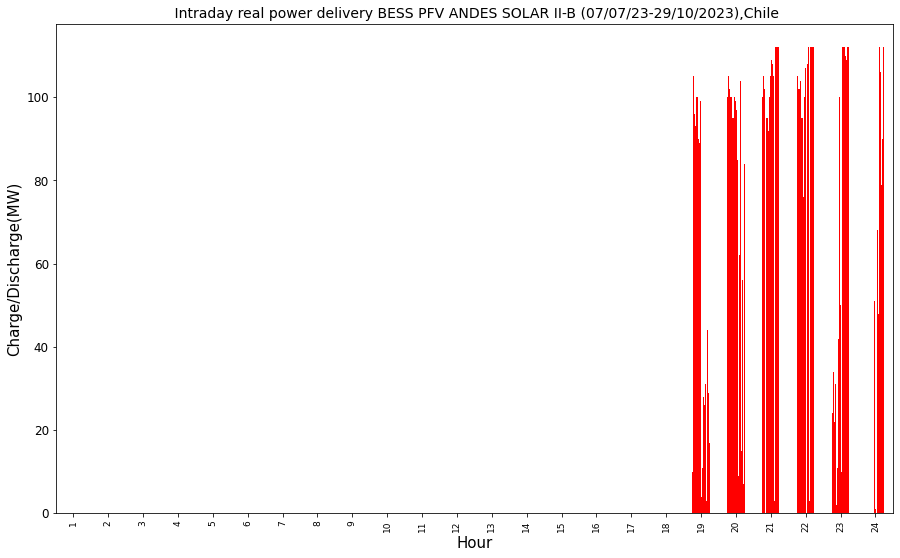

In [85]:
ax_real_CEN = df_operacion_REAL_BESS_ANDES_2B_final.plot(kind='bar',
    title = "10/26/2023,Chile",figsize=(15, 9),
    legend=False, fontsize=12,stacked=False,color = ['red'])
#mediumturquoise
xlabels_real_CEN = df_operacion_REAL_BESS_ANDES_2B_final.index
ax_real_CEN.set_xticklabels(xlabels_real_CEN,fontsize=9)
ax_real_CEN.set_xlabel("Hour", fontsize=15)
ax_real_CEN.set_ylabel("Charge/Discharge(MW)", fontsize=15)
ax_real_CEN.set_title(" Intraday real power delivery BESS PFV ANDES SOLAR II-B (07/07/23-29/10/2023),Chile", fontsize=14)
                      
#Operación real de la descarga de la planta BESS ANDES-2B en función de los datos públicos presentes en el coordinador.

Vemos en la data real que BESS ANDES-2B entrega energía durante un mayor número de horas que la agendada originalmente por el coordinador (CEN)

* La capacidad máxima de entrega de energía es de 112 MWh
* La mayor demanda energética se concentra durante las 19-24 hrs, siendo principalmente las 20-23 hrs donde se concentra mayor entrega de energía(Máx)

In [86]:
print("Cap. máx de entrega de energía[MWh]:",max(df_operacion_REAL_BESS_ANDES_2B_final.max()))

Cap. máx de entrega de energía[MWh]: 112.0


In [87]:
#Queda pendiente:
#analizar histograma de los datos en las horas de descarga(19-24 hrs)
#promedio de descarga por hora (19:00 hrs = 67 MW,20:00 hrs = 100 MW)
#REALIZAR BOXPLOT para ver distribución Q1,Q2,Q3.

Plot programación CEN vs data real de descarga planta BESS ANDES 2B 

In [88]:
# Import Library

#import matplotlib.pyplot as plt
#import numpy as np

# # Define Data
# df_programacion_SEN_BESS_ANDES_2B_final_traspose.plot.bar(color = "blue",label ="hola2",legend = False)

# df_operacion_REAL_BESS_ANDES_2B_final.plot.bar(color = "red",label ="hola",legend = False)
# #L=plt.legend()
# #L.get_texts()[0].set_text('make it short')

# #xlabels_real_CEN = df_operacion_REAL_BESS_ANDES_2B_final.index
# #ax_real_CEN.set_xticklabels(xlabels_real_CEN,fontsize=9)

# # Xticks
# #plot.xticks(df_operacion_REAL_BESS_ANDES_2B_final.index,df_operacion_REAL_BESS_ANDES_2B_final.columns)

# #plot.xlabel("Hour")
# # Display the plot
# plot.show()


#df_programacion_SEN_BESS_ANDES_2B_final_traspose.plot(kind = "bar", color = "blue",label ="hola2",legend = False)

# Plotting both the curves simultaneously 
#plt.plot(df_operacion_REAL_BESS_ANDES_2B_final.index,df_operacion_REAL_BESS_ANDES_2B_final[df_operacion_REAL_BESS_ANDES_2B_final.columns[0]], color='r', label='sin') 

In [89]:
#data programacion (esta será el estandar de index y col)
df_programacion_SEN_BESS_ANDES_2B_final_traspose#[1]#.columns

#data operacion real (se cambia el nombre de index y col)
df_operacion_REAL_BESS_ANDES_2B_final#.columns


#Copia los df para no alterar los df originales.
#copia programación CEN:
df_plot_programacion_CEN_BESS_ANDES2B = df_programacion_SEN_BESS_ANDES_2B_final_traspose.copy()
#Copia data real:
df_plot_operacion_REAL_BESS_ANDES2B = df_operacion_REAL_BESS_ANDES_2B_final.copy()


#Una vez copiado los df, se procede a estandarizar las bases de datos copiadas.

#change col:
for i in range(len(fechas_disponibles_teorico)):
#Cambia el nombre de la columna:
        df_plot_operacion_REAL_BESS_ANDES2B.rename(columns={fechas_disponibles_teorico[i]: i},inplace = True)

# Change index row:
df_plot_operacion_REAL_BESS_ANDES2B.index = df_plot_programacion_CEN_BESS_ANDES2B.index

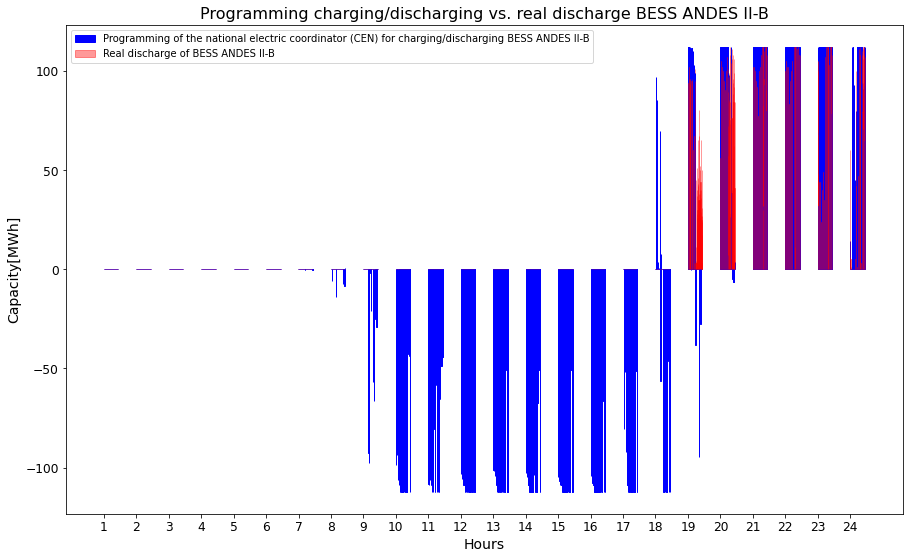

In [90]:
fig_prog_real = plt.subplots(figsize =(15, 9)) 

#df_programacion_SEN_BESS_ANDES_2B_final_traspose.plot(kind = "bar", color = "blue",label ="hola2",legend = False)
#df_operacion_REAL_BESS_ANDES_2B_final.plot.bar(color = "red",label ="hola",legend = False)

# Make the plot
x = np.arange(24)
x = x+1
valor_suma = 0
#Recorre las 77 columnas:
for i in range(len(df_plot_operacion_REAL_BESS_ANDES2B.columns)):

        #Plot de los dif. valores de las horas para c/columna.

        #plot data programación CEN.
        plt.bar(x+valor_suma, height= df_plot_programacion_CEN_BESS_ANDES2B[i], color ='b', width = 0.004, 
                edgecolor ='blue', label ='Programming of the national electric coordinator (CEN) for charging/discharging BESS ANDES II-B')

        
        #Plot data operación REAL:
        plt.bar(x+valor_suma, height= df_plot_operacion_REAL_BESS_ANDES2B[i], color ='r', width = 0.004, 
                edgecolor ='red', label ='Real discharge of BESS ANDES II-B',alpha=0.4)
        valor_suma = valor_suma+0.004

        
plt.xlabel("Hours",fontsize=14) 
plt.ylabel("Capacity[MWh]",fontsize=14) 
plt.title("Programming charging/discharging vs. real discharge BESS ANDES II-B",fontsize=16)
plt.legend(['Programming of the national electric coordinator (CEN) for charging/discharging BESS ANDES II-B',
             'Real discharge of BESS ANDES II-B'], loc='upper left')
plt.xticks(x,fontsize=12.3)
plt.yticks(fontsize=12.3)
plt.show() 



##### Comentarios:
Programación del CEN indica:
* Cargar BESS entre 10:00-18:00 hrs.
* Descarga BESS entre 19:00-24:00 hrs

Data real:
* Vemos que la mayor descarga ocurre entre las 19:00-22:00 hrs.
* Durante las 23:00-24:00 hrs no es mucho lo que aporta la batería.
* Pareciera indicar que la duración de la BESS es de 3-4 hrs.

In [91]:
#Ajustemos el análisis a sólo las horas de descarga (20-24 hrs)

In [92]:

df_plot_operacion_REAL_BESS_ANDES2B_ajustado = df_plot_operacion_REAL_BESS_ANDES2B.copy()

df_plot_programacion_CEN_BESS_ANDES2B_ajustado = df_plot_programacion_CEN_BESS_ANDES2B.copy()


df_plot_operacion_REAL_BESS_ANDES2B_ajustado_final = df_plot_operacion_REAL_BESS_ANDES2B_ajustado.transpose()
df_plot_programacion_CEN_BESS_ANDES2B_ajustado_final = df_plot_programacion_CEN_BESS_ANDES2B_ajustado.transpose()

df_plot_operacion_REAL_BESS_ANDES2B_ajustado_final = df_plot_operacion_REAL_BESS_ANDES2B_ajustado_final[['20','21','22','23','24']]

df_plot_programacion_CEN_BESS_ANDES2B_ajustado_final = df_plot_programacion_CEN_BESS_ANDES2B_ajustado_final[['20','21','22','23','24']]

In [93]:
df_plot_operacion_REAL_BESS_ANDES2B_ajustado_final_invertido = df_plot_operacion_REAL_BESS_ANDES2B_ajustado_final.transpose()
df_plot_programacion_CEN_BESS_ANDES2B_ajustado_final_invertido = df_plot_programacion_CEN_BESS_ANDES2B_ajustado_final.transpose()


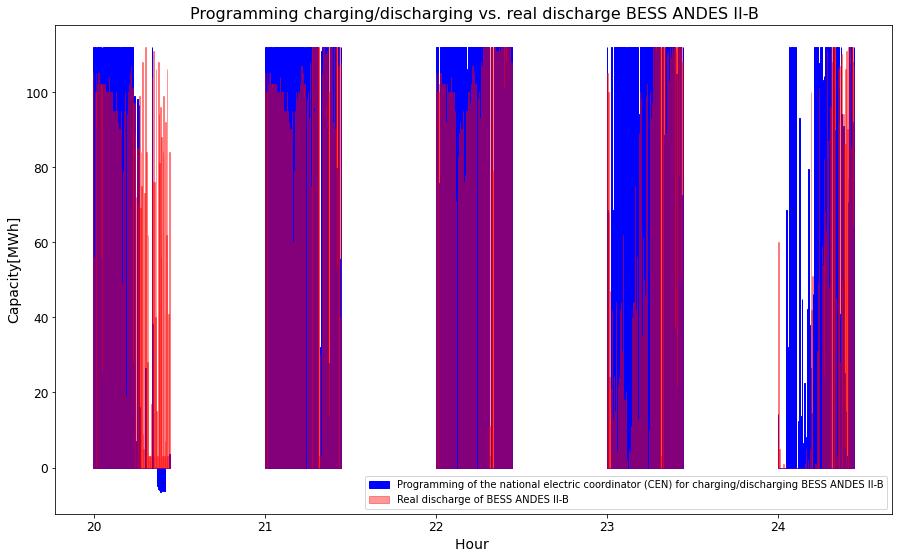

In [94]:

#Considera sólo las horas 20:00-24:00 hrs.
fig_prog_real_ajustada = plt.subplots(figsize =(15, 9)) 

#df_programacion_SEN_BESS_ANDES_2B_final_traspose.plot(kind = "bar", color = "blue",label ="hola2",legend = False)
#df_operacion_REAL_BESS_ANDES_2B_final.plot.bar(color = "red",label ="hola",legend = False)

new_x = np.arange(20, 25, 1)
new_x.dtype
#new_x = new_x.tolist()

valor_suma = 0
#Recorre las 77 columnas:
for i in range(len(df_plot_programacion_CEN_BESS_ANDES2B_ajustado_final_invertido.columns)):

        #Plot de los dif. valores de las horas para c/columna.

        #plot data programación CEN.
        plt.bar(new_x+valor_suma, height= df_plot_programacion_CEN_BESS_ANDES2B_ajustado_final_invertido[i], color ='b', width = 0.004, 
                edgecolor ='blue', label ='Programming of the national electric coordinator (CEN) for charging/discharging BESS ANDES2B')


        #Plot data operación REAL:
        plt.bar(new_x+valor_suma, height= df_plot_operacion_REAL_BESS_ANDES2B_ajustado_final_invertido[i], color ='r', width = 0.004, 
                edgecolor ='red', label ='Actual discharge of BESS ANDES-2B',alpha=0.4)
        valor_suma = valor_suma+0.004

        # #plot data programación CEN.
        # plt.bar(new_x[1]+valor_suma, height= df_plot_programacion_CEN_BESS_ANDES2B_ajustado_final_invertido[i], color ='b', width = 0.004, 
        #         edgecolor ='blue', label ='Programming of the national electric coordinator (CEN) for charging/discharging BESS ANDES2B')

        
        # #Plot data operación REAL:
        # plt.bar(new_x[1]+valor_suma, height= df_plot_operacion_REAL_BESS_ANDES2B_ajustado_final_invertido[i], color ='r', width = 0.004, 
        #         edgecolor ='red', label ='Actual discharge of BESS ANDES-2B',alpha=0.4)
        # valor_suma = valor_suma+0.004

        # #plot data programación CEN.
        # plt.bar(new_x[2]+valor_suma, height= df_plot_programacion_CEN_BESS_ANDES2B_ajustado_final_invertido[i], color ='b', width = 0.004, 
        #         edgecolor ='blue', label ='Programming of the national electric coordinator (CEN) for charging/discharging BESS ANDES2B')

        
        # #Plot data operación REAL:
        # plt.bar(new_x[2]+valor_suma, height= df_plot_operacion_REAL_BESS_ANDES2B_ajustado_final_invertido[i], color ='r', width = 0.004, 
        #         edgecolor ='red', label ='Actual discharge of BESS ANDES-2B',alpha=0.4)
        # valor_suma = valor_suma+0.004


        # #plot data programación CEN.
        # plt.bar(new_x[3]+valor_suma, height= df_plot_programacion_CEN_BESS_ANDES2B_ajustado_final_invertido[i], color ='b', width = 0.004, 
        #        edgecolor ='blue', label ='Programming of the national electric coordinator (CEN) for charging/discharging BESS ANDES2B')

        
        # #Plot data operación REAL:
        # plt.bar(new_x[3]+valor_suma, height= df_plot_operacion_REAL_BESS_ANDES2B_ajustado_final_invertido[i], color ='r', width = 0.004, 
        #        edgecolor ='red', label ='Actual discharge of BESS ANDES-2B',alpha=0.4)
        #valor_suma = valor_suma+0.004

        
#plt.xlabel("Hours",fontsize=14) 
plt.ylabel("Capacity[MWh]",fontsize=14)
plt.xlabel("Hour ",fontsize=14)  
plt.title("Programming charging/discharging vs. real discharge BESS ANDES II-B",fontsize=16)
plt.legend(['Programming of the national electric coordinator (CEN) for charging/discharging BESS ANDES II-B',
             'Real discharge of BESS ANDES II-B'], loc='best')#loc='upper left')
plt.xticks(new_x,fontsize=12.3)
plt.yticks(fontsize=12.3)
plt.show() 



Comentarios:

In [95]:

new_df_ajustado_programacion = df_plot_programacion_CEN_BESS_ANDES2B_ajustado_final_invertido.transpose()

new_df_ajustado_data_real = df_plot_operacion_REAL_BESS_ANDES2B_ajustado_final_invertido.transpose()
#df_plot_operacion_REAL_BESS_ANDES2B_ajustado_final_invertido
print("promedio descarga datos PROGRAMACIÓN:\n ",new_df_ajustado_programacion.mean())
print("###############################################")
print("max descarga datos PROGRAMACIÓN:\n ",new_df_ajustado_programacion.max())
print("###############################################")
print("promedio descarga datos OPERACIÓN REAL:\n ",new_df_ajustado_data_real.mean())
print("###############################################")
print("Max descarga datos OPERACIÓN REAL:\n ",new_df_ajustado_data_real.max())

promedio descarga datos PROGRAMACIÓN:
  20     59.675000
21     98.830357
22    103.308036
23     95.842857
24     52.492857
dtype: float64
###############################################
max descarga datos PROGRAMACIÓN:
  20    112.0
21    112.0
22    112.0
23    112.0
24    112.0
dtype: object
###############################################
promedio descarga datos OPERACIÓN REAL:
  20    77.207207
21    96.468468
22    98.045045
23    70.864865
24    42.468468
dtype: float64
###############################################
Max descarga datos OPERACIÓN REAL:
  20    112.0
21    112.0
22    112.0
23    112.0
24    112.0
dtype: float64


Veamos la desviación de la descarga programada vs descarga real

In [96]:
df_plot_operacion_REAL_BESS_ANDES2B_final = df_plot_operacion_REAL_BESS_ANDES2B.transpose()
df_plot_programacion_CEN_BESS_ANDES2B_final = df_plot_programacion_CEN_BESS_ANDES2B.transpose()

In [143]:
#Data operacion_real

df_plot_operacion_REAL_BESS_ANDES2B_final #Formato 24x77(colxfila)

#Data programación operacion.
df_plot_programacion_CEN_BESS_ANDES2B_final #Formato 24x77(colxfila)

#data_comparacion es mismo formato que df_operacion_REAL_BESS_ANDES_2B_final
data_comparacion = df_plot_operacion_REAL_BESS_ANDES2B_final.copy()

#vacía los valores del dataframe para rellenarlos posteriormente con la dif entre cap entregada programada(CEN) vs cap entregada real (data real)
data_comparacion = data_comparacion*0
data_comparacion


#Recorre las 24 columnas del df:
for i in data_comparacion.columns:
#     print(i)
#     data_comparacion[i]
    #recorre las 77 filas de c/columna:
    for j in range(len(data_comparacion[i])):



        #elimina del analisis las horas 1,2,3,...,18 puesto que no tenemos la data real que considere solo la entrega de energía por la BESS
        #está mezclada con la energía que entrega la planta solar...
        if int(i)<19:
           data_comparacion[str(i)][j] = 0.0
        else:
            #asigna evalua la diferencia entre la desviación de la data.
            #la desviación se tomará considerando: entrega energía real (data real) vs entrega de energía programada (CEN)
        
            #                         entrega de energía programada por el coordinador (CEN)      - entrega de energía real(data real) 
            data_comparacion[str(i)][j] =  df_plot_programacion_CEN_BESS_ANDES2B_final[str(i)][j] - df_plot_operacion_REAL_BESS_ANDES2B_final[str(i)][j]  

data_comparacion

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,72.0,7.0,-5.0,-38.7,7.0,8.3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,102.0,56.0,7.0,7.0,-36.5,-60.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,85.0,12.0,12.0,12.0,-100.0,-5.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,46.0,-14.2,7.0,7.0,-68.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,18.0,-100.0,-100.0,-100.0,-24.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-3.0,-106.0,0.0,0.0,0.0,27.0
108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-27.0,-3.0,5.0,0.0,0.0,-21.9
109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-31.0,-41.0,-112.0,0.0,-61.7,-19.9
110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-17.0,-1.0,15.6,4.0,-35.5,-43.6


In [144]:
#Veamos las desviaciones reportadas:
data_comparacion_final = data_comparacion[['20','21','22','23','24']]
print("max:\n",data_comparacion_final.max())
print("Descripción data comparación desviación:\n",data_comparacion_final.describe())
#data_comparacion_final.head(50)

max:
 20     93.0
21    112.0
22    112.0
23    112.0
24    112.0
dtype: float64
Descripción data comparación desviación:
                20          21          22          23          24
count  111.000000  111.000000  111.000000  111.000000  111.000000
mean   -18.003604    2.243243    5.184685   24.832432    9.488288
std     45.892790   37.834373   32.095418   56.619411   56.208968
min   -113.800000 -112.000000 -112.000000 -112.000000 -112.000000
25%    -62.000000    0.000000    0.000000    0.000000   -4.300000
50%      5.000000    9.000000    7.000000   12.000000    3.000000
75%     12.000000   13.950000   12.000000   70.000000   40.350000
max     93.000000  112.000000  112.000000  112.000000  112.000000


In [153]:
contador_prob = 0
for i in data_comparacion_final['24']:
    if abs(i) <= 23:
        contador_prob = contador_prob+1

contador_prob

55

In [154]:
print("probabilidad de operación correcta:",(contador_prob/111)*100,"%")

probabilidad de operación correcta: 49.549549549549546 %


In [101]:
data_comparacion_plot = data_comparacion_final.copy()

data_comparacion_plot = data_comparacion_plot.transpose()

Text(0.5, 1.0, ' Discharge deviation CEN vs. real discharge BESS ANDES SOLAR II-B')

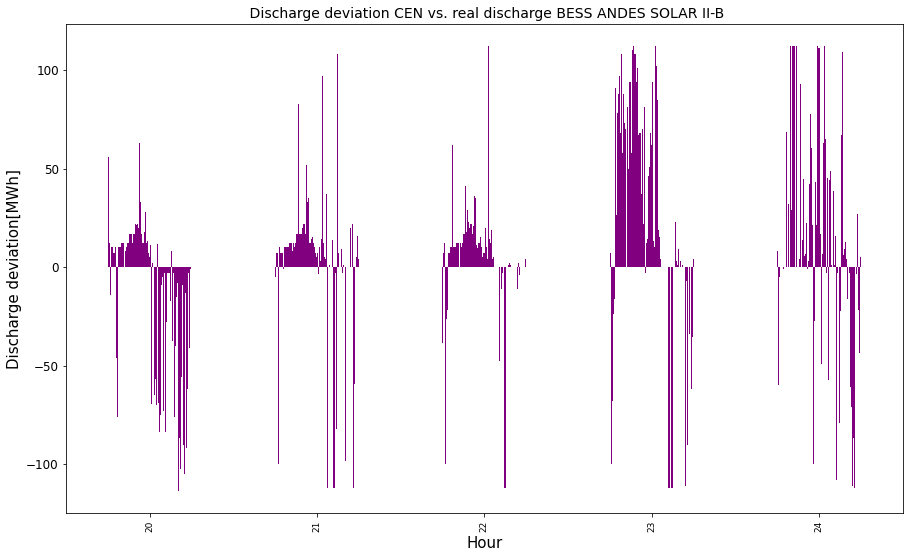

In [102]:

ax_desviacion = data_comparacion_plot.plot(kind='bar',
    title = "10/26/2023,Chile",figsize=(15, 9),
    legend=False, fontsize=12,stacked=False,color = ['purple'])
#mediumturquoise
xlabels_desviacion = data_comparacion_plot.index
ax_desviacion.set_xticklabels(xlabels_desviacion,fontsize=9)
ax_desviacion.set_xlabel("Hour", fontsize=15)
ax_desviacion.set_ylabel("Discharge deviation[MWh]", fontsize=15)
ax_desviacion.set_title(" Discharge deviation CEN vs. real discharge BESS ANDES SOLAR II-B", fontsize=14)
                      


Histograma de las desviaciones:

(array([[26., 10., 67.,  7.,  1.],
        [ 9.,  3., 87.,  8.,  4.],
        [ 5.,  3., 90., 10.,  3.],
        [ 8.,  8., 45., 15., 35.],
        [11., 10., 54., 19., 17.]]),
 array([-113.8 ,  -68.64,  -23.48,   21.68,   66.84,  112.  ]),
 <a list of 5 BarContainer objects>)

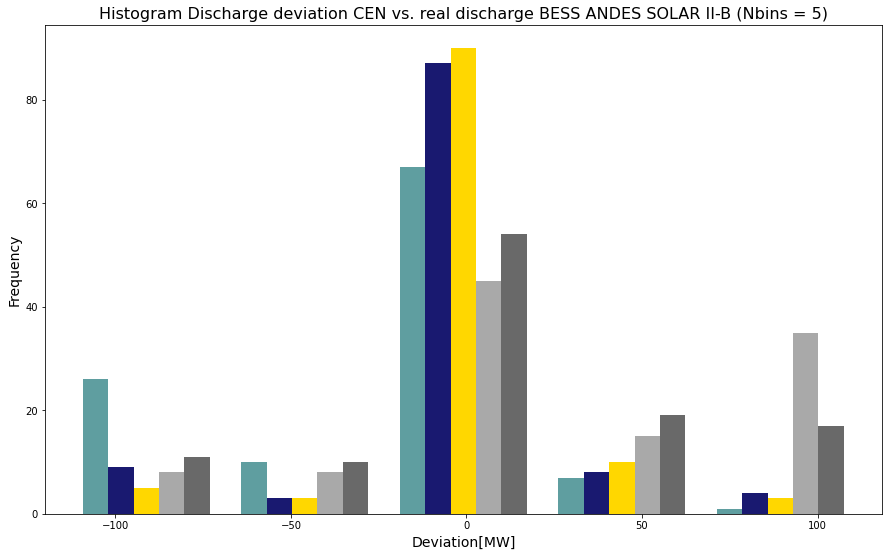

In [103]:
#Histograma de las desviaciones:
#Data programación:

new_x.dtype
data_desviacion_descarga = [data_comparacion_final['20'],data_comparacion_final['21'],
          data_comparacion_final['22'],data_comparacion_final['23'],
          data_comparacion_final['24']]

fig_desv, ax_desv = plt.subplots(figsize = (15,9))

ax_desv.set_ylabel("Frequency",fontsize=14)
ax_desv.set_xlabel("Deviation[MW]",fontsize=14)
ax_desv.set_title("Histogram Discharge deviation CEN vs. real discharge BESS ANDES SOLAR II-B (Nbins = 5)",fontsize=16)

#ax_desv.legend(label = ['Desv. hour 20.','Desv. hour 21','Desv. hour 22','Desv. hour 23','Desv. hour 24'])

ax_desv.hist(data_desviacion_descarga, bins=5,alpha=1,density = False,color = ['cadetblue','midnightblue','gold','darkgray','dimgray'],
            label = ['Desv. hour 20.','Desv. hour 21','Desv. hour 22','Desv. hour 23','Desv. hour 24'])

#ax_desv.legend(loc='best')
#plt.show()

Histograma de programación vs data real:

Evalúa frecuencia y probabilidad de descarga bajo ciertos niveles de operación[MW]

In [104]:
new_df_ajustado_programacion#['24']
#new_df_ajustado_data_real

xmax = new_df_ajustado_programacion['24'].max()
xmin = new_df_ajustado_programacion['24'].min()
number = len(new_df_ajustado_programacion['24'])
print("nbins:",(xmax-xmin)/number)

nbins: 1.0


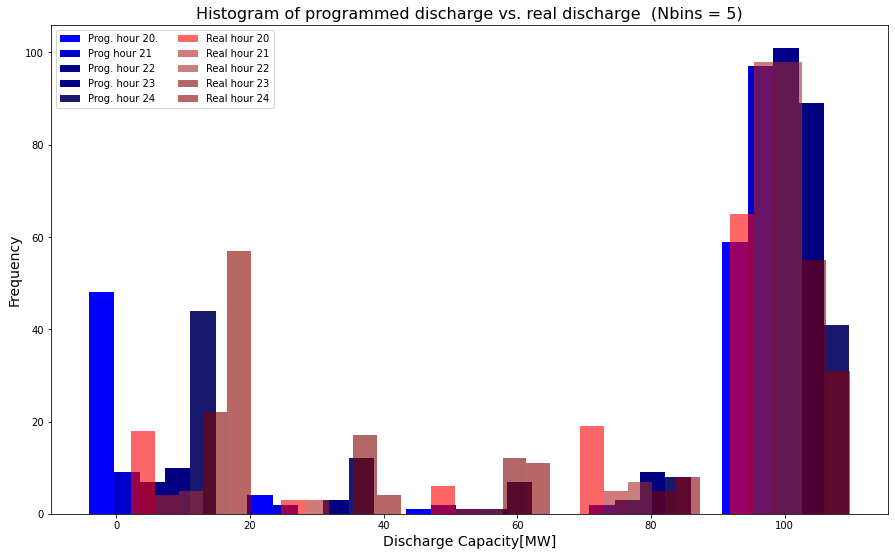

In [168]:
#Histograma:

#Data programación:
data_f = [new_df_ajustado_programacion['20'],new_df_ajustado_programacion['21'],
          new_df_ajustado_programacion['22'],new_df_ajustado_programacion['23'],
          new_df_ajustado_programacion['24']]


#Data operación real:
data_f1 = [new_df_ajustado_data_real['20'],new_df_ajustado_data_real['21'],
          new_df_ajustado_data_real['22'],new_df_ajustado_data_real['23'],
          new_df_ajustado_data_real['24']]



fig_test, ax_test = plt.subplots(figsize = (15,9))

# ax_test.hist(data_f, bins=6,alpha=1,density = False,color = ['b','mediumblue','darkblue','navy','midnightblue'],
#              label = ['Prog. hour 20.','Prog hour 21','Prog. hour 22','Prog. hour 23','Prog. hour 24'])


# ax_test.hist(data_f1, bins=6,alpha=0.6,density = True ,color = ['red','firebrick','brown','maroon','darkred'],
#              label = ['Real hour 20','Real hour 21','Real hour 22','Real hour 23','Real hour 24'])
#ax_test.legend(ncol = 2)


ax_test.set_ylabel("Frequency",fontsize=14)
ax_test.set_xlabel("Discharge Capacity[MW]",fontsize=14)
ax_test.set_title("Histogram of programmed discharge vs. real discharge  (Nbins = 5)",fontsize=16)


#Histogram of programmed discharge vs. real discharge  (Nbins = 5)


#Histogram of programmed discharge vs. actual discharge 

#plt.xlabel("Hour ",fontsize=14)  
#plt.title("Programming charging/discharging vs. actual discharge BESS ANDES2B",fontsize=16)





#plt.hist(x, bins=6,alpha=1,density = False)
#plt.hist(new_df_ajustado_programacion['23'], bins=6,alpha=1,density = False)




#plt.show()

#Extra solo para visualizar la matriz con prob y frecuencias:

#print("con esto obtenemos las probabilidades:")
ax_test.hist(data_f, bins=5,alpha=1,density = False,color = ['b','mediumblue','darkblue','navy','midnightblue'],
           label = ['Prog. hour 20.','Prog hour 21','Prog. hour 22','Prog. hour 23','Prog. hour 24'])

#ax_test.legend()

#Descomentar:
ax_test.hist(data_f1, bins=5,alpha=0.6,density = False ,color = ['red','firebrick','brown','maroon','darkred'],
          label = ['Real hour 20','Real hour 21','Real hour 22','Real hour 23','Real hour 24'])

#Descomentar:
ax_test.legend(ncol = 2)

#se interpreta:
#columna 0:
#dataframe:
       #col
#filas #36,3,0,1,1,36
       #6,3,0,1,3,64
       #5,0,0,1,1,68
       #7,2,1,1,4,62
       #24,11,3,7,6,26

#Col = 0:
#36/77 datos durante la hora 20 se encuentran en el grupo [-6.4-0]
#6/77 datos durante la hora 21 se encuentran en el grupo [-6.4-0]
#5/77 datos durante la hora 21 se encuentran en el grupo [-6.4-0]
#7/77 datos durante la hora 21 se encuentran en el grupo [-6.4-0]
#24/77 datos durante la hora 21 se encuentran en el grupo [-6.4-0]

#Col = 1:
#3/77 datos durante la hora 20 se encuentran en el grupo [13.3]
#3/77 datos durante la hora 21 se encuentran en el grupo [13.3]
#0/77 datos durante la hora 22 se encuentran en el grupo [13.3]
#2/77 datos durante la hora 23 se encuentran en el grupo [13.3]
#11/77 datos durante la hora 24 se encuentran en el grupo [13.3]

In [106]:
#Veamos la desviación de la descarga programada vs descarga real

In [107]:
#preguntas: Cuanta energía es entregada durante cada una de las horas? 20-21,22,23,24:

#Osea: 21 hrs: en promedio el CEN indica una entrega de "x"[MW], mientras que durante 22 y 23 hrs la entrega de energía es de "y", y esta decae a
#"c" durante las 24 hrs. 

#podría utilizar un boxplot o un histograma para ver como distribuye los datos.

Veamos la desviación de la descarga programada vs descarga real

In [108]:
df_plot_operacion_REAL_BESS_ANDES2B_final = df_plot_operacion_REAL_BESS_ANDES2B.transpose()
df_plot_programacion_CEN_BESS_ANDES2B_final = df_plot_programacion_CEN_BESS_ANDES2B.transpose()

In [109]:
#Data operacion_real

df_plot_operacion_REAL_BESS_ANDES2B_final #Formato 24x77(colxfila)

#Data programación operacion.
df_plot_programacion_CEN_BESS_ANDES2B_final #Formato 24x77(colxfila)

#data_comparacion es mismo formato que df_operacion_REAL_BESS_ANDES_2B_final
data_comparacion = df_plot_operacion_REAL_BESS_ANDES2B_final.copy()

#vacía los valores del dataframe para rellenarlos posteriormente con la dif entre cap entregada programada(CEN) vs cap entregada real (data real)
data_comparacion = data_comparacion*0
data_comparacion


#Recorre las 24 columnas del df:
for i in data_comparacion.columns:
#     print(i)
#     data_comparacion[i]
    #recorre las 77 filas de c/columna:
    for j in range(len(data_comparacion[i])):



        #elimina del analisis las horas 1,2,3,...,18 puesto que no tenemos la data real que considere solo la entrega de energía por la BESS
        #está mezclada con la energía que entrega la planta solar...
        if int(i)<19:
           data_comparacion[str(i)][j] = 0.0
        else:
            #asigna evalua la diferencia entre la desviación de la data.
            #la desviación se tomará considerando: entrega energía real (data real) vs entrega de energía programada (CEN)
        
            #                         entrega de energía programada por el coordinador (CEN)      - entrega de energía real(data real) 
            data_comparacion[str(i)][j] =  df_plot_programacion_CEN_BESS_ANDES2B_final[str(i)][j] - df_plot_operacion_REAL_BESS_ANDES2B_final[str(i)][j]  

data_comparacion

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,72.0,7.0,-5.0,-38.7,7.0,8.3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,102.0,56.0,7.0,7.0,-36.5,-60.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,85.0,12.0,12.0,12.0,-100.0,-5.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,46.0,-14.2,7.0,7.0,-68.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,18.0,-100.0,-100.0,-100.0,-24.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-3.0,-106.0,0.0,0.0,0.0,27.0
108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-27.0,-3.0,5.0,0.0,0.0,-21.9
109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-31.0,-41.0,-112.0,0.0,-61.7,-19.9
110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-17.0,-1.0,15.6,4.0,-35.5,-43.6


In [110]:
#Veamos las desviaciones reportadas:
data_comparacion_final = data_comparacion[['20','21','22','23','24']]
data_comparacion_final.max()
data_comparacion_final.describe()
#data_comparacion_final.head(50)


,20,21,22,23,24
count,111.000000,111.000000,111.000000,111.000000,111.000000
mean,-18.003604,2.243243,5.184685,24.832432,9.488288
std,45.892790,37.834373,32.095418,56.619411,56.208968
min,-113.800000,-112.000000,-112.000000,-112.000000,-112.000000
25%,-62.000000,0.000000,0.000000,0.000000,-4.300000
50%,5.000000,9.000000,7.000000,12.000000,3.000000
75%,12.000000,13.950000,12.000000,70.000000,40.350000
max,93.000000,112.000000,112.000000,112.000000,112.000000


In [111]:
data_comparacion_plot = data_comparacion.copy()

data_comparacion_plot = data_comparacion_plot.transpose()

Text(0.5, 1.0, ' Real intraday energy consumption BESS PFV ANDES SOLAR II-B (07/07/23-29/10/2023),Chile')

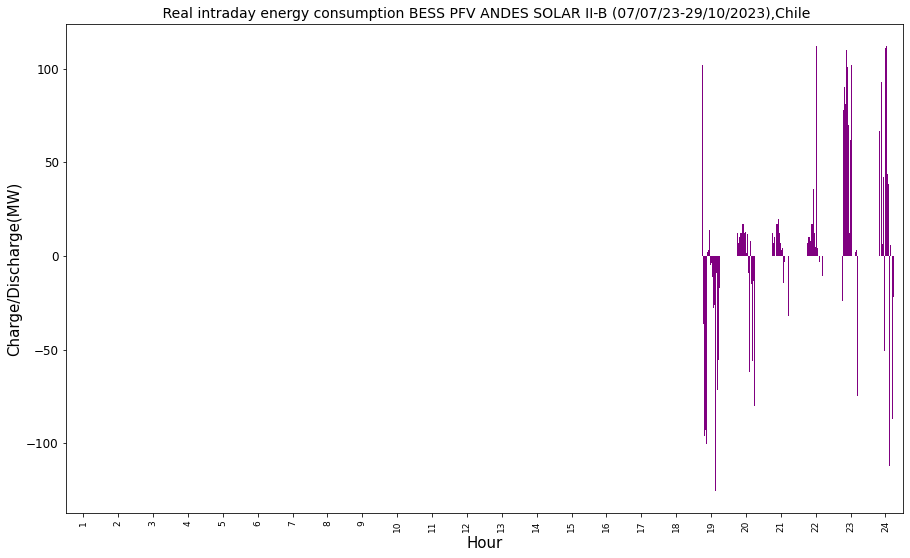

In [112]:
ax_desviacion = data_comparacion_plot.plot(kind='bar',
    title = "10/26/2023,Chile",figsize=(15, 9),
    legend=False, fontsize=12,stacked=False,color = ['purple'])
#mediumturquoise
xlabels_desviacion = data_comparacion_plot.index
ax_desviacion.set_xticklabels(xlabels_desviacion,fontsize=9)
ax_desviacion.set_xlabel("Hour", fontsize=15)
ax_desviacion.set_ylabel("Charge/Discharge(MW)", fontsize=15)
ax_desviacion.set_title(" Real intraday energy consumption BESS PFV ANDES SOLAR II-B (07/07/23-29/10/2023),Chile", fontsize=14)
                      


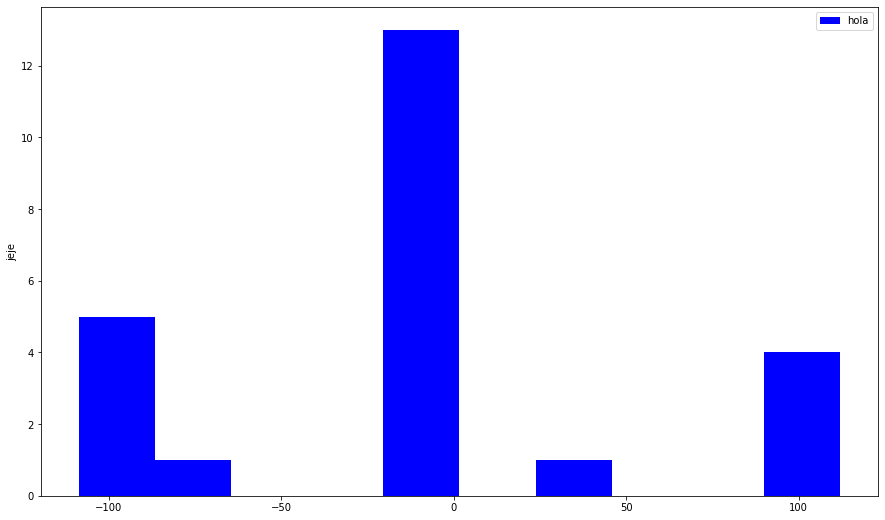

In [113]:


# Histograma (demasiadas clases)
fig, ax = plt.subplots(figsize =(15, 9))
counts, bins = np.histogram(df_plot_programacion_CEN_BESS_ANDES2B[[19]])
ax.hist(df_plot_programacion_CEN_BESS_ANDES2B[[19]],bins,color = ['b'],label = "hola",
        alpha = 1)#, bins = 40)

#ax.hist(df_plot_operacion_REAL_BESS_ANDES2B[[19,20,21,22,23,24]],bins,color = ['r','r','r','r','r','r'],label = "red",
#        alpha = 0.5)#, bins = 40)

ax.set_ylabel("jeje")
#ax.tick_params(x = counts)
ax.legend()

In [114]:


# # Histograma (demasiadas clases)
# fig, ax = plt.subplots(figsize =(15, 9))
# counts, bins = np.histogram(df_plot_programacion_CEN_BESS_ANDES2B[[19,20,21,22,23,24]])
# ax.hist(df_plot_programacion_CEN_BESS_ANDES2B[[19,20,21,22,23,24]],bins,color = ['b','b','b','b','b','b'],label = "hola",
#         alpha = 1)#, bins = 40)

# ax.hist(df_plot_operacion_REAL_BESS_ANDES2B[[19,20,21,22,23,24]],bins,color = ['r','r','r','r','r','r'],label = "red",
#         alpha = 0.5)#, bins = 40)



# ax.legend()
#ax.xlabel("Hours",fontsize=14) 
#ax.ylabel("Capacity[MWh]",fontsize=14) 


Con que frecuencia ocurre carga/Descarga?

Programacion CEN
######  DATAFRAME: df_programacion_SEN_BESS_ANDES_2B_final

In [115]:
#Creamos subset que contienen sólo las cargas y descargas.
df_programacion_SEN_BESS_ANDES_2B_carga = df_programacion_SEN_BESS_ANDES_2B_final_traspose.copy()
df_programacion_SEN_BESS_ANDES_2B_descarga = df_programacion_SEN_BESS_ANDES_2B_final_traspose.copy()


#transpone el df (está en 77x24 y lo pasamos a 24x77 (colxfilas))
df_programacion_SEN_BESS_ANDES_2B_carga = df_programacion_SEN_BESS_ANDES_2B_carga.transpose()

#almacena solo las cargas(CUANDO INYECTA ENERGÍA EN LA RED):
df_programacion_SEN_BESS_ANDES_2B_carga#["10"].value_counts


#Variable auxiliar que almacena la frecuencia de descargas en el sistema (entrega de energía por la bateria)
aux_contador_pos = []

#recorre las columnas: (24 columnas)
for i in df_programacion_SEN_BESS_ANDES_2B_carga.columns:
    #print("columna hora",i)
    valor_frecuencia_positiva = 0
    df_programacion_SEN_BESS_ANDES_2B_carga[i]

    #recorre las filas (77 filas)
    for j in range(len(df_programacion_SEN_BESS_ANDES_2B_carga[i])):
    
        if df_programacion_SEN_BESS_ANDES_2B_carga[i][j] >0:
            valor_frecuencia_positiva = valor_frecuencia_positiva +1
    aux_contador_pos.append(valor_frecuencia_positiva)


#CREACION DE NUEVO DF PARA PLOT:

#valor aux
total_dias = len(df_programacion_SEN_BESS_ANDES_2B_carga)
#aux_contador_pos

#Transforma array en un dataframe:
#DF capacidad instalada por región:
df_frecuencia_positiva = pd.DataFrame(aux_contador_pos)
df_frecuencia_positiva
df_frecuencia_positiva.rename(columns={0: "Frecuencia"},inplace = True)
df_frecuencia_positiva['Hora'] = [x+1 for x in range(24)]

#df_frecuencia_positiva.index

df_frecuencia_pos = df_frecuencia_positiva[['Hora','Frecuencia']]
df_frecuencia_pos['Porcentaje'] = float()

for i in range(len(df_frecuencia_pos['Porcentaje'])):
    df_frecuencia_pos['Porcentaje'][i] = np.round((df_frecuencia_pos['Frecuencia'][i]/total_dias)*100,decimals = 2)
#df_frecuencia_pos



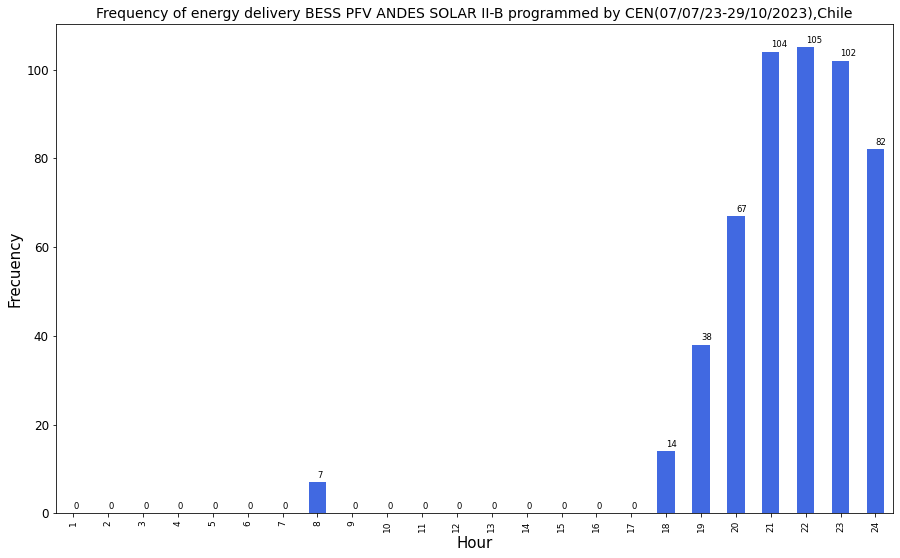

In [116]:
#PLOT DE LA FRECUENCIA:
ax_frecuencia_pos = df_frecuencia_pos[["Frecuencia"]].plot(kind='bar',
    title = "Chile",figsize=(15, 9),
    legend=False, fontsize=12,stacked=False,color = ['royalblue'])
#mediumturquoise
xlabels_frec_pos = df_frecuencia_pos['Hora']
ax_frecuencia_pos.set_xticklabels(xlabels_frec_pos,fontsize=9)
ax_frecuencia_pos.set_xlabel("Hour", fontsize=15)
ax_frecuencia_pos.set_ylabel("Frecuency", fontsize=15)
ax_frecuencia_pos.set_title("Frequency of energy delivery BESS PFV ANDES SOLAR II-B programmed by CEN(07/07/23-29/10/2023),Chile", fontsize=14)

def addtext_frec_pos(x,y):
   for i in range(len(x)):
       plt.text(i,y[i]+1,str(y[i]),color = 'black',fontsize = 8.5)

#Agrega el texto en la parte superior de la barra:
addtext_frec_pos(xlabels_frec_pos,df_frecuencia_pos['Frecuencia'])

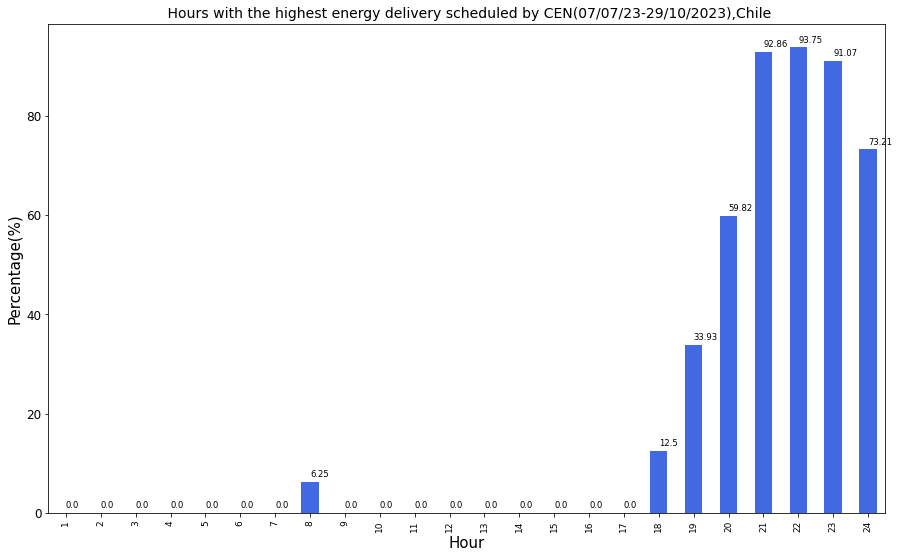

In [117]:
#PLOT DE LA FRECUENCIA:
ax_frecuencia_pos = df_frecuencia_pos[["Porcentaje"]].plot(kind='bar',
    title = "Chile",figsize=(15, 9),
    legend=False, fontsize=12,stacked=False,color = ['royalblue'])
#mediumturquoise
xlabels_frec_pos = df_frecuencia_pos['Hora']
ax_frecuencia_pos.set_xticklabels(xlabels_frec_pos,fontsize=9)
ax_frecuencia_pos.set_xlabel("Hour", fontsize=15)
ax_frecuencia_pos.set_ylabel("Percentage(%)", fontsize=15)
ax_frecuencia_pos.set_title(" Hours with the highest energy delivery scheduled by CEN(07/07/23-29/10/2023),Chile", fontsize=14)

def addtext_frec_pos(x,y):
   for i in range(len(x)):
       plt.text(i,y[i]+1,str(y[i]),color = 'black',fontsize = 8.5)

#Agrega el texto en la parte superior de la barra:
addtext_frec_pos(xlabels_frec_pos,df_frecuencia_pos['Porcentaje'])

Comentarios:
* entrega de energía entre 20-23 horas ocurre más de un 90% de los casos.
* La entrega de energía agendada se programa principalmente entre las 20:00 y las 24:00 hrs

In [118]:
#preguntas: Cuanta energía es entregada durante cada una de las horas? 20-21,22,23,24:

#Osea: 21 hrs: en promedio el CEN indica una entrega de "x"[MW], mientras que durante 22 y 23 hrs la entrega de energía es de "y", y esta decae a
#"c" durante las 24 hrs. 

#podría utilizar un boxplot o un histograma para ver como distribuye los datos.


Datos reales entrega de energía Sistema electrico nacional (SEN)

###### DATAFRAME: df_operacion_REAL_BESS_ANDES_2B

In [119]:
#REF
#formato 77x24(colxfilas)
#df_operacion_REAL_BESS_ANDES_2B_final

In [120]:
#Traspone el df para obtener un df en formato 24x77(colxfilas)
df_operacion_REAL_BESS_ANDES_2B_final = df_operacion_REAL_BESS_ANDES_2B_final.transpose()


In [121]:
df_operacion_REAL_BESS_ANDES_2B_final

aux_contador_pos_real = []

#recorre las columnas: (24 columnas)
for i in df_operacion_REAL_BESS_ANDES_2B_final.columns:
    #print("columna hora",i)
    valor_frecuencia_positiva = 0
    df_operacion_REAL_BESS_ANDES_2B_final[i]

    #recorre las filas (77 filas)
    for j in range(len(df_operacion_REAL_BESS_ANDES_2B_final[i])):
    
        if df_operacion_REAL_BESS_ANDES_2B_final[i][j] >0:
            valor_frecuencia_positiva = valor_frecuencia_positiva +1
    aux_contador_pos_real.append(valor_frecuencia_positiva)
aux_contador_pos_real
#CREACION DE NUEVO DF PARA PLOT:
total_dias_real = len(df_operacion_REAL_BESS_ANDES_2B_final)
aux_contador_pos_real
#Transforma array en un dataframe:
#DF capacidad instalada por región:
df_frecuencia_positiva_real = pd.DataFrame(aux_contador_pos_real)
df_frecuencia_positiva_real
df_frecuencia_positiva_real.rename(columns={0: "Frecuencia"},inplace = True)
df_frecuencia_positiva_real['Hora'] = [x+1 for x in range(24)]

df_frecuencia_pos_real = df_frecuencia_positiva_real[['Hora','Frecuencia']]
df_frecuencia_pos_real['Porcentaje'] = float()

for i in range(len(df_frecuencia_pos_real['Porcentaje'])):
    df_frecuencia_pos_real['Porcentaje'][i] = np.round((df_frecuencia_pos_real['Frecuencia'][i]/total_dias_real)*100,decimals = 2)
df_frecuencia_pos_real


,Hora,Frecuencia,Porcentaje
0,1,0,0.00
1,2,0,0.00
2,3,0,0.00
3,4,0,0.00
4,5,0,0.00
5,6,0,0.00
6,7,0,0.00
7,8,0,0.00
8,9,0,0.00
9,10,0,0.00


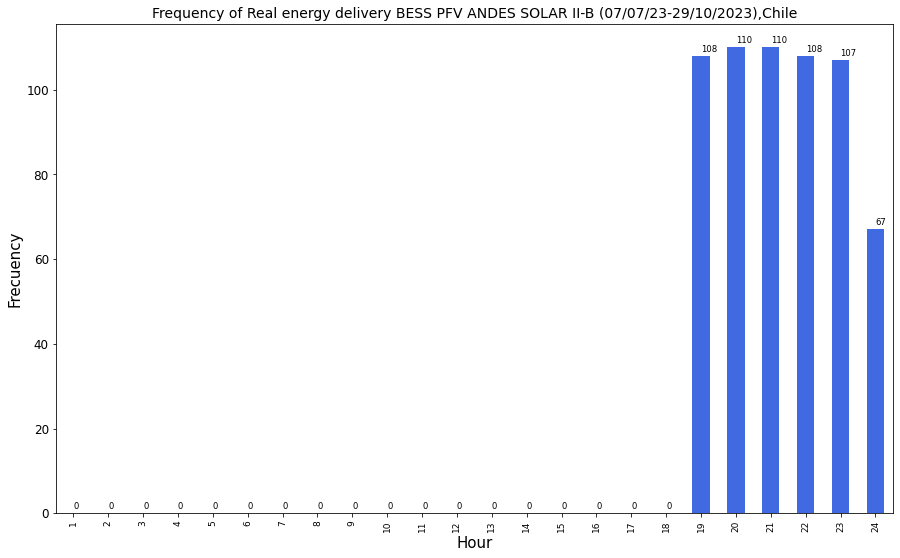

In [122]:
#PLOT DE LA FRECUENCIA:
ax_frecuencia_pos_real = df_frecuencia_pos_real[["Frecuencia"]].plot(kind='bar',
    title = "Chile",figsize=(15, 9),
    legend=False, fontsize=12,stacked=False,color = ['royalblue'])
#mediumturquoise
xlabels_frec_pos_real = df_frecuencia_pos_real['Hora']
ax_frecuencia_pos_real.set_xticklabels(xlabels_frec_pos_real,fontsize=9)
ax_frecuencia_pos_real.set_xlabel("Hour", fontsize=15)
ax_frecuencia_pos_real.set_ylabel("Frecuency", fontsize=15)
ax_frecuencia_pos_real.set_title("Frequency of Real energy delivery BESS PFV ANDES SOLAR II-B (07/07/23-29/10/2023),Chile", fontsize=14)

def addtext_frec_pos(x,y):
   for i in range(len(x)):
       plt.text(i,y[i]+1,str(y[i]),color = 'black',fontsize = 8.5)

#Agrega el texto en la parte superior de la barra:
addtext_frec_pos(xlabels_frec_pos_real,df_frecuencia_pos_real['Frecuencia'])

Observaciones:
1. la frecuencia está sesgada, pues como vimos previamente en la reunión la información real está cruzada con la energía que entrega
la planta solar (recordar que es híbrido(BESS+Solar)).
2. Por lo tanto, se puede considerar que la información es correcta a contar de las horas donde el sol no existe y que eventualmente la energía que entrega la planta corresponde únicamente a la energía que entrega la batería BESS.
3. Entonces, se considerará para el análisis únicamente la información que está entre las 19:00 y 24:00 hrs. (donde se asume que el sol ya no está)

Observaciones de la frecuencia:

a. Vemos que la frecuencia de entrega de energía es mayor a la considerada por el coordinador en las horas analizada(19:00/24:00 hrs).

Evaluación (programación CEN vs data operación REAL):
Frecuencia:

Hora: 19:00(CEN): 23 veces.          Hora 19:00(Data real): 74 veces.

Hora: 20:00(CEN): 43 veces.          Hora 20:00(Data real): 76 veces.

Hora: 21:00(CEN): 71 veces.          Hora 21:00(Data real): 76 veces.

Hora: 22:00(CEN): 72 veces.          Hora 22:00(Data real): 74 veces.

Hora: 23:00(CEN): 70 veces.          Hora 23:00(Data real): 73 veces.

Hora: 24:00(CEN): 57 veces.          Hora 24:00(Data real): 44 veces.


Importante: Considerar que es únicamente frecuencia de descarga(entrega de energía) al sistema, por lo que no estamos analizando la desviación entre la entrega de energía (MW) programada(CEN) vs la real entregada(data real).

Vamos a analizar esto mismo!



Desviacion data programada CEN vs data REAL

In [123]:

#Data programada CEN:
df_programacion_SEN_BESS_ANDES_2B_final_traspose = df_programacion_SEN_BESS_ANDES_2B_final_traspose.transpose()
#data programada (formato 24x77(colxfilas))
df_programacion_SEN_BESS_ANDES_2B_final_traspose

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-103.6,-102.7,0.0,0.0,112.0,112.0,100.0,66.3,112.0,14.3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-102.4,-101.9,0.0,0.0,112.0,112.0,112.0,112.0,68.5,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-98.8,...,-104.7,-103.8,0.0,68.5,112.0,112.0,112.0,112.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-98.3,...,-103.3,-46.4,0.0,28.6,112.0,90.8,112.0,112.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-58.0,-53.2,0.0,96.8,112.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,0.0,0.0,0.0,0.0,0.0,0.0,-0.1,0.1,0.0,-112.0,...,-38.9,-31.4,-112.0,-6.8,0.0,0.0,112.0,112.0,112.0,112.0
108,0.0,0.0,0.0,0.0,0.0,0.0,-0.2,0.2,0.0,-33.0,...,-44.6,-112.0,-112.0,-65.0,0.0,0.0,112.0,112.0,112.0,90.1
109,0.0,0.0,0.0,0.0,0.0,0.0,-0.3,0.3,0.0,-38.4,...,-112.0,-112.0,-43.6,-60.1,0.0,0.0,0.0,112.0,50.3,92.1
110,0.0,0.0,0.0,0.0,0.0,0.0,-0.4,0.4,0.0,-39.4,...,-58.7,-44.2,-112.0,-112.0,0.0,0.0,55.6,112.0,72.5,64.4


In [124]:
for i in df_operacion_REAL_BESS_ANDES_2B_final.columns:
    df_operacion_REAL_BESS_ANDES_2B_final[i] = df_operacion_REAL_BESS_ANDES_2B_final[i].astype(float)


In [125]:
#Data real: (formato 24x77 (colxfilas))
df_operacion_REAL_BESS_ANDES_2B_final

#Data programada CEN:
#df_programacion_SEN_BESS_ANDES_2B_final_traspose = df_programacion_SEN_BESS_ANDES_2B_final_traspose.transpose()
#data programada (formato 24x77(colxfilas))
df_programacion_SEN_BESS_ANDES_2B_final_traspose


#crea el dataframe donde se comparará la diferencia de cap de energía entregada (descarga de energía) entre la programada vs la data real
#data_comparacion es mismo formato que df_operacion_REAL_BESS_ANDES_2B_final
data_comparacion = df_operacion_REAL_BESS_ANDES_2B_final.copy()

#vacía los valores del dataframe para rellenarlos posteriormente con la dif entre cap entregada programada(CEN) vs cap entregada real (data real)
data_comparacion = data_comparacion*0
data_comparacion

#Recorre las 24 columnas del df:
for i in data_comparacion.columns:
#     print(i)
#     data_comparacion[i]
    #recorre las 77 filas de c/columna:
    for j in range(len(data_comparacion[i])):


        #elimina del analisis las horas 1,2,3,...,18 puesto que no tenemos la data real que considere solo la entrega de energía por la BESS
        #está mezclada con la energía que entrega la planta solar...
        if i<19:
           data_comparacion[i][j] = 0.0
        else:
            #asigna evalua la diferencia entre la desviación de la data.
            #la desviación se tomará considerando: entrega energía real (data real) vs entrega de energía programada (CEN)
        
            #                         entrega de energía programada por el coordinador (CEN)      - entrega de energía real(data real) 
            data_comparacion[i][j] =  df_programacion_SEN_BESS_ANDES_2B_final_traspose[str(i)][j] - df_operacion_REAL_BESS_ANDES_2B_final[i][j]  

            print("operacion_prog_col",i,"row_j",j,df_programacion_SEN_BESS_ANDES_2B_final_traspose[str(i)][j],"MW")
            print("operacion_real_col",i,"row_j",j,df_operacion_REAL_BESS_ANDES_2B_final[i][j],"MW")
            print("dif:",data_comparacion[i][j])

#data_comparacion

# # df_operacion_REAL_BESS_ANDES_2B_final[1]

# # df_filtraado = df_operacion_REAL_BESS_ANDES_2B_final[[21,22,23]]
# # df_filtraado.head(77)
# #data_comparacion = data_comparacion[[19,20,21,22,23,24]]

df_plot_comparacion = data_comparacion.copy()
df_plot_comparacion = df_plot_comparacion.transpose()

operacion_prog_col 19 row_j 0 112.0 MW
operacion_real_col 19 row_j 0 40.0 MW
dif: 72.0
operacion_prog_col 19 row_j 1 112.0 MW
operacion_real_col 19 row_j 1 10.0 MW
dif: 102.0
operacion_prog_col 19 row_j 2 112.0 MW
operacion_real_col 19 row_j 2 27.0 MW
dif: 85.0
operacion_prog_col 19 row_j 3 112.0 MW
operacion_real_col 19 row_j 3 66.0 MW
dif: 46.0
operacion_prog_col 19 row_j 4 112.0 MW
operacion_real_col 19 row_j 4 94.0 MW
dif: 18.0
operacion_prog_col 19 row_j 5 112.0 MW
operacion_real_col 19 row_j 5 96.0 MW
dif: 16.0
operacion_prog_col 19 row_j 6 112.0 MW
operacion_real_col 19 row_j 6 96.0 MW
dif: 16.0
operacion_prog_col 19 row_j 7 68.5 MW
operacion_real_col 19 row_j 7 105.0 MW
dif: -36.5
operacion_prog_col 19 row_j 8 112.0 MW
operacion_real_col 19 row_j 8 98.0 MW
dif: 14.0
operacion_prog_col 19 row_j 9 112.0 MW
operacion_real_col 19 row_j 9 99.0 MW
dif: 13.0
operacion_prog_col 19 row_j 10 68.5 MW
operacion_real_col 19 row_j 10 94.0 MW
dif: -25.5
operacion_prog_col 19 row_j 11 112.0 MW

Distribución de la diferencia (desviación) entre la energía entregada real vs la programada:

Text(0.5, 1.0, ' Real intraday energy consumption BESS PFV ANDES SOLAR II-B (07/07/23-29/10/2023),Chile')

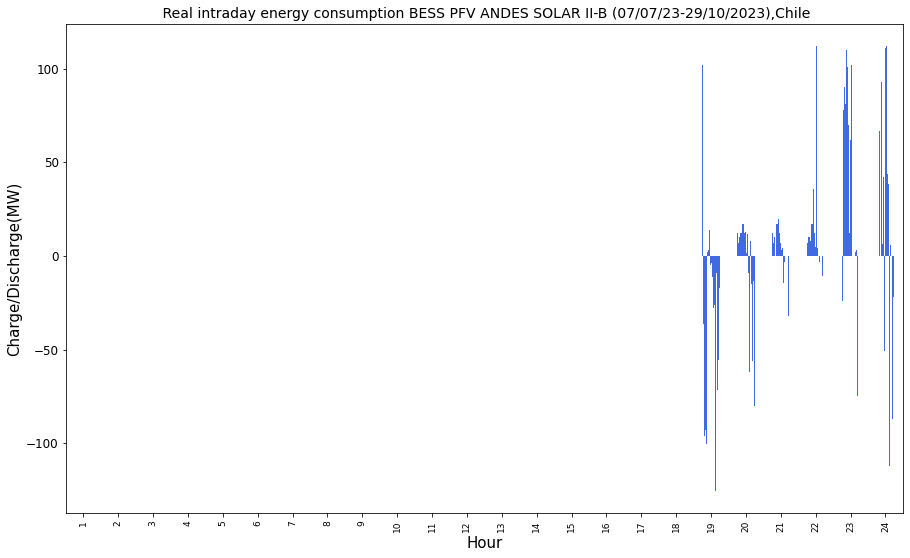

In [126]:
ax_desviacion = df_plot_comparacion.plot(kind='bar',
    title = "10/26/2023,Chile",figsize=(15, 9),
    legend=False, fontsize=12,stacked=False,color = ['royalblue'])
#mediumturquoise
xlabels_desviacion = df_plot_comparacion.index
ax_desviacion.set_xticklabels(xlabels_desviacion,fontsize=9)
ax_desviacion.set_xlabel("Hour", fontsize=15)
ax_desviacion.set_ylabel("Charge/Discharge(MW)", fontsize=15)
ax_desviacion.set_title(" Real intraday energy consumption BESS PFV ANDES SOLAR II-B (07/07/23-29/10/2023),Chile", fontsize=14)
                      


In [127]:
data_comparacion = data_comparacion[[19,20,21,22,23,24]]
data_comparacion = data_comparacion.transpose()

Text(0.5, 1.0, ' Real intraday energy consumption BESS PFV ANDES SOLAR II-B (07/07/23-29/10/2023),Chile')

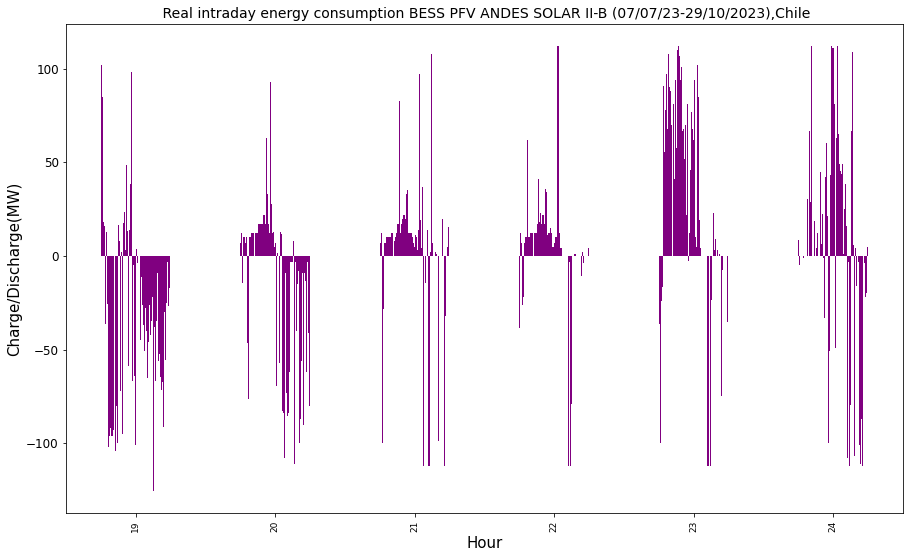

In [128]:
ax_desviacion = data_comparacion.plot(kind='bar',
    title = "10/26/2023,Chile",figsize=(15, 9),
    legend=False, fontsize=12,stacked=False,color = ['purple'])
#mediumturquoise
xlabels_desviacion = data_comparacion.index
ax_desviacion.set_xticklabels(xlabels_desviacion,fontsize=9)
ax_desviacion.set_xlabel("Hour", fontsize=15)
ax_desviacion.set_ylabel("Charge/Discharge(MW)", fontsize=15)
ax_desviacion.set_title(" Real intraday energy consumption BESS PFV ANDES SOLAR II-B (07/07/23-29/10/2023),Chile", fontsize=14)
                      


In [129]:
# RECORDAR: entrega de energía real(data real) - entrega de energía programada por el coordinador (CEN)

Observaciones:
* Entre las 19:00 y las 20:00 hrs la energía entregada por la batería generalmente es superior a la cantidad de energía programada por el CEN.

* Entre las 21:00 y las 22:00 hrs la energía entregada por la batería es similar a la cantidad de energía programada por el CEN, donde la mayoría de los casos esta cantidad es ligeramente inferior a la programada (se obesrva en la diferencia negativa), mientras que en casos atípicos ocurre que la energía entregada es muy superior a la energía programada (se observa en los picks positivos en estas horas), se puede ver el RIO (Registro de instrucciones de operación disponible en el coordinador.)

In [130]:
#fecha a analizar
#29-09-2023
fechas_disponibles_teorico
print(fechas_disponibles_teorico.index("29-09-2023"))



84


In [131]:
#Lee el archivo:

#df_transelec = pd.read_csv("Grid_and_zero_data/Tarea_1/LinFluEtaBloSim.csv",sep = ",",encoding='latin-1')


In [132]:
#df_transelec

In [133]:
# import matplotlib.pyplot as plot

# edades = [12, 15, 13, 12, 18, 20, 19, 20, 13, 12, 13, 17, 15, 16, 13, 14, 13, 17, 19]

# intervalos = range(min(edades), max(edades) + 2) #calculamos los extremos de los intervalos

# plot.hist(x=edades, bins=intervalos, color='#F2AB6D', rwidth=0.85)
# plot.title('Histograma de edades - matplotlib - codigopiton.com')
# plot.xlabel('Edades')
# plot.ylabel('Frecuencia')
# plot.xticks(intervalos)

# plot.show() #dibujamos el histograma

In [134]:
# import matplotlib.pyplot as plot
# plot.hist(x=df_programacion_SEN_BESS_ANDES_2B_traspose_final.index, color='#F2AB6D')